# Box Office Revenue Prediction
#### Yunbo Chen - 1871493

### Data Import and cleaning

In [93]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('movies_metadata.csv')
data.shape

C:\Users\chenr\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45466, 24)

In [94]:
data = data[(data.revenue!=0) & (data.release_date>='1990-1-1') & (data.original_language == 'en')]
#& (data.original_language == 'en')
data.shape

(4853, 24)

### Distribution of movie reveneues 

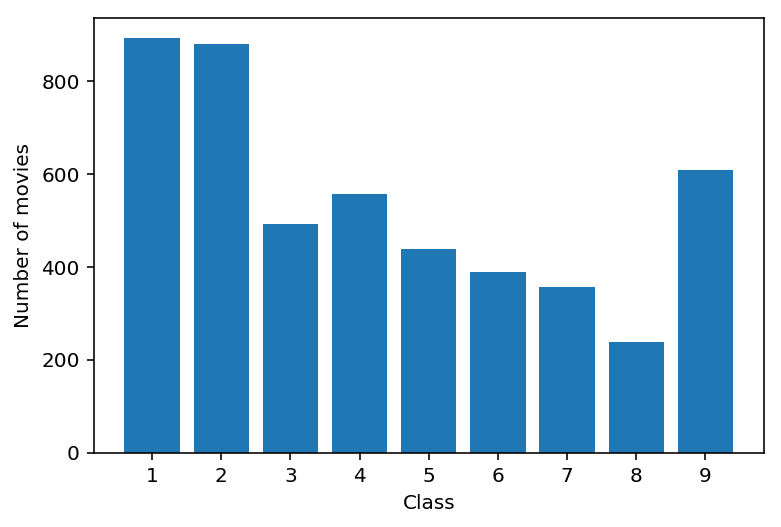

In [95]:
revenue = data.revenue
class_bins = [0]*9
for rev in revenue:
    if rev <= 1000000:
        class_bins[0]+=1
    elif rev <= 10000000:
        class_bins[1]+=1
    elif rev <= 20000000:
        class_bins[2]+=1
    elif rev <= 40000000:
        class_bins[3]+=1
    elif rev <= 65000000:
        class_bins[4]+=1
    elif rev <= 100000000:
        class_bins[5]+=1
    elif rev <= 150000000:
        class_bins[6]+=1
    elif rev <= 200000000:
        class_bins[7]+=1
    else:
        class_bins[8]+=1
plt.bar(np.arange(9), class_bins)
plt.xticks(np.arange(9), np.arange(1,10))
plt.xlabel('Class')
plt.ylabel('Number of movies')
plt.show()

In [96]:
# headers
list(data.columns.values)

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

### Adding features to represent actor/director values

In [97]:
data['DirectorHistoryGross']=1.0
data['ActorHistoryAverage_Gross']=1.0
list(data.columns.values)

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count',
 'DirectorHistoryGross',
 'ActorHistoryAverage_Gross']

In [98]:
# adding actor lists and director name
data = data.drop(columns=['belongs_to_collection', 'homepage', 'id', 'original_language',
                   'original_title', 'overview', 'poster_path','popularity',
                   'spoken_languages', 'production_countries', 'status','video',
                   'tagline', 'title','vote_average', 'vote_count'])
data.head()

,adult,budget,genres,imdb_id,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,1.0,1.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,1.0,1.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,1.0,1.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,1.0,1.0
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,1.0,1.0


In [99]:
data.dtypes

adult                         object
budget                        object
genres                        object
imdb_id                       object
production_companies          object
release_date                  object
revenue                      float64
runtime                      float64
DirectorHistoryGross         float64
ActorHistoryAverage_Gross    float64
dtype: object

In [100]:
data = data[~data.budget.str.contains('jpg')]
data.shape

(4853, 10)

In [101]:
# change budget type
data['budget'] = data['budget'].astype('float64')
data.dtypes

adult                         object
budget                       float64
genres                        object
imdb_id                       object
production_companies          object
release_date                  object
revenue                      float64
runtime                      float64
DirectorHistoryGross         float64
ActorHistoryAverage_Gross    float64
dtype: object

In [102]:
data= data[data.budget!=0]
data.shape

(3771, 10)

In [103]:
# write it back to csv for checkpoint
data.to_csv('checkpoint.csv')

# Checkpoint

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('checkpoint.csv')
data.rename(columns={ data.columns[0]: "rownum" }, inplace=True)
data.shape

(3771, 11)

In [105]:
data.head()

,rownum,adult,budget,genres,imdb_id,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross
0,0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,1.0,1.0
1,1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,1.0,1.0
2,3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,1.0,1.0
3,5,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,1.0,1.0
4,8,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0114576,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,106.0,1.0,1.0


### Get the cast dataset

In [106]:
cast_all = pd.read_csv("credits.csv")
cast_all['rownum']=cast_all.index
cast_all.head()

,cast,crew,id,rownum
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,1
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,2
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,3
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,4


In [107]:
data_cast = data.merge(cast_all, on='rownum')
data_cast.tail()

,rownum,adult,budget,genres,imdb_id,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross,cast,crew,id
3766,45014,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",tt1648190,"[{'name': 'Imagine Entertainment', 'id': 23}, ...",2017-08-03,71000000.0,95.0,1.0,1.0,"[{'cast_id': 1, 'character': 'Herself', 'credi...","[{'credit_id': '586c280ec3a368038c000501', 'de...",433067
3767,45139,False,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",tt4877122,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2017-07-28,66913939.0,86.0,1.0,1.0,"[{'cast_id': 6, 'character': 'Kolya', 'credit_...","[{'credit_id': '52fe4ba6c3a368484e193207', 'de...",133088
3768,45167,False,11000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt5362988,"[{'name': 'Thunder Road Pictures', 'id': 3528}...",2017-08-03,184770205.0,111.0,1.0,1.0,"[{'cast_id': 2, 'character': 'Johny Remirez', ...","[{'credit_id': '52fe4cfcc3a368484e1d0b41', 'de...",204821
3769,45409,False,800000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0933361,[],2006-11-23,1328612.0,100.0,1.0,1.0,"[{'cast_id': 3, 'character': 'Viktor', 'credit...","[{'credit_id': '53b7a7b90e0a2676b8006ab6', 'de...",280422
3770,45412,False,2000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",tt1718881,"[{'name': 'Profit', 'id': 21163}]",2010-09-30,1268793.0,107.0,1.0,1.0,"[{'cast_id': 3, 'character': '', 'credit_id': ...","[{'credit_id': '5462921bc3a3681247000641', 'de...",293654


In [108]:
# Bring out the actors and director lists
for index, row in data_cast.iterrows():
    cast = eval(row['cast'])
    crew = eval(row['crew'])
    casts, crews = [], ''
    for entry in cast:
        casts.append(entry['profile_path'])
    for entry in crew:
        if entry['job']=='Director':
            crews=entry['profile_path']
    data_cast.at[index,'cast']=casts
    data_cast.at[index,'crew']=crews

In [109]:
data_cast.head()

,rownum,adult,budget,genres,imdb_id,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross,cast,crew,id
0,0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,1.0,1.0,"[/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMm...",/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,1.0,1.0,"[/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6...",/fok4jaO62v5IP6hkpaaAcXuw2H.jpg,8844
2,3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,1.0,1.0,"[/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJ...",/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg,31357
3,5,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,1.0,1.0,"[/ks7Ba8x9fJUlP9decBr6Dh5mThX.jpg, /lvTSwUcvJR...",/nKmUpRpuQIsYubR7vIxVKhkbaTW.jpg,949
4,8,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0114576,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,106.0,1.0,1.0,"[/aqZ9RjL5j44HMlBMvTaawhHiGOH.jpg, /3nNL6AvMAY...",/dAuDsStGGlUESaaAYQf0GCE2JWo.jpg,9091


In [110]:
# Calculate director history revenue
for index, row in data_cast.iterrows():
    director = row['crew']
    rdate = row['release_date']
    #query dataset
    df2 = data_cast[(data_cast['release_date']< rdate) & (data_cast['crew']==director) ]
    rsum = max(df2['revenue'].sum(),1.0)
    data_cast.at[index, 'DirectorHistoryGross']=rsum

In [111]:
# Calculate actors history revenue
for index, row in data_cast.iterrows():
    if index%100==0:
        print("index: {}".format(index))
    actors = row['cast']
    rdate = row['release_date']
    rsum = 1.0
    for actor in actors:
        # query dataset
        mask = data_cast.cast.apply(lambda x: actor in x)
        df2 = data_cast[(data_cast['release_date']< rdate) & (mask)]
        rsum += df2['revenue'].sum()
    data_cast.at[index, 'ActorHistoryAverage_Gross']=rsum

index: 0
index: 100
index: 200
index: 300
index: 400
index: 500
index: 600
index: 700
index: 800
index: 900
index: 1000
index: 1100
index: 1200
index: 1300
index: 1400
index: 1500
index: 1600
index: 1700
index: 1800
index: 1900
index: 2000
index: 2100
index: 2200
index: 2300
index: 2400
index: 2500
index: 2600
index: 2700
index: 2800
index: 2900
index: 3000
index: 3100
index: 3200
index: 3300
index: 3400
index: 3500
index: 3600
index: 3700


In [112]:
data_cast.adult = data_cast.adult.astype(int)
data_cast

,rownum,adult,budget,genres,imdb_id,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross,cast,crew,id
0,0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,3.735540e+08,81.0,1.000000e+00,2.589193e+10,"[/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMm...",/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,2.627972e+08,104.0,6.200000e+07,2.246237e+11,"[/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6...",/fok4jaO62v5IP6hkpaaAcXuw2H.jpg,8844
2,3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,8.145216e+07,127.0,1.000000e+00,2.412263e+09,"[/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJ...",/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg,31357
3,5,0,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,1.874368e+08,170.0,7.550586e+07,4.766800e+11,"[/ks7Ba8x9fJUlP9decBr6Dh5mThX.jpg, /lvTSwUcvJR...",/nKmUpRpuQIsYubR7vIxVKhkbaTW.jpg,949
4,8,0,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0114576,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,6.435017e+07,106.0,1.123830e+08,2.632461e+10,"[/aqZ9RjL5j44HMlBMvTaawhHiGOH.jpg, /3nNL6AvMAY...",/dAuDsStGGlUESaaAYQf0GCE2JWo.jpg,9091
5,9,0,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0113189,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,3.521940e+08,130.0,1.534000e+07,2.519825e+10,"[/1JXL0zrA26JjdoX8sqf57fJRDVM.jpg, /iIxP2IzvcL...",/qhx0AySf8yH3kiHrinWknUJbr1y.jpg,710
6,10,0,62000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0112346,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",1995-11-17,1.078795e+08,106.0,3.045170e+08,2.391146e+09,"[/nmlitv4g2jXO3sJrnA9g980j2uc.jpg, /q8pCSQzGLr...",/2zw9Iq9uo4vZiTQNQWdNFwbA1TA.jpg,9087
7,13,0,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",tt0113987,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",1995-12-22,1.368176e+07,192.0,2.901052e+08,5.997492e+09,"[/jdoBTIru71FbPuHGEgox5RVmIO0.jpg, /Atg0mSjK9D...",/uHdNGBkrI74eYfUP2Uie7nuo0Nn.jpg,10858
8,14,0,98000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0112760,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...",1995-12-22,1.001732e+07,119.0,2.550002e+08,2.292214e+11,"[/6b8cRJOItz7yNpYuLCPkl5kv4m2.jpg, /tEQG1Us5Iu...",/lOCRZzC1UZfkObWpQtKxga5ZV8F.jpg,1408
9,15,0,52000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",tt0112641,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-11-22,1.161124e+08,178.0,2.145554e+08,3.468629e+11,"[/lvTSwUcvJRLAJ2FB5qFaukel516.jpg, /m57fGJemBT...",/4Xwx5XL1RJj0JQmEo8Fhr6nkpOg.jpg,524


In [113]:
# write to checkpoint2
data_cast.to_csv("checkpoint2.csv")

## Checkpoint 2

In [114]:
%config InlineBackend.figure_format = 'retina'
data_cast = pd.read_csv("checkpoint2.csv")

In [115]:
# get rid of some columns
data_cast = data_cast.drop(columns=['imdb_id', 'crew','cast','id'])
data_cast = data_cast.drop(data_cast.columns[0], axis=1)

In [116]:
# found some 0 runtime data, drop them
data_cast = data_cast[data_cast.runtime>0.0]

In [117]:
data_cast

,rownum,adult,budget,genres,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross
0,0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,3.735540e+08,81.0,1.000000e+00,2.589193e+10
1,1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,2.627972e+08,104.0,6.200000e+07,2.246237e+11
2,3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,8.145216e+07,127.0,1.000000e+00,2.412263e+09
3,5,0,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,1.874368e+08,170.0,7.550586e+07,4.766800e+11
4,8,0,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,6.435017e+07,106.0,1.123830e+08,2.632461e+10
5,9,0,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,3.521940e+08,130.0,1.534000e+07,2.519825e+10
6,10,0,62000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",1995-11-17,1.078795e+08,106.0,3.045170e+08,2.391146e+09
7,13,0,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...","[{'name': 'Hollywood Pictures', 'id': 915}, {'...",1995-12-22,1.368176e+07,192.0,2.901052e+08,5.997492e+09
8,14,0,98000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Le Studio Canal+', 'id': 183}, {'na...",1995-12-22,1.001732e+07,119.0,2.550002e+08,2.292214e+11
9,15,0,52000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-11-22,1.161124e+08,178.0,2.145554e+08,3.468629e+11


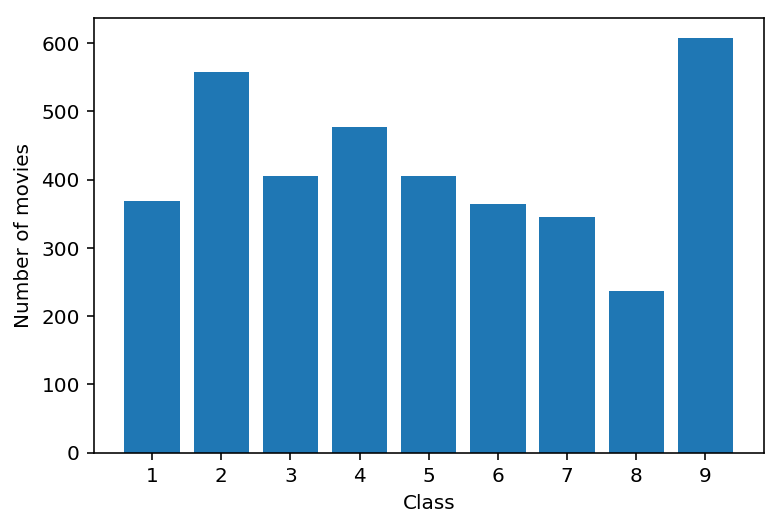

In [118]:
# new histogram of label distribution
revenue = data_cast.revenue
class_bins = [0]*9
for rev in revenue:
    if rev <= 1000000:
        class_bins[0]+=1
    elif rev <= 10000000:
        class_bins[1]+=1
    elif rev <= 20000000:
        class_bins[2]+=1
    elif rev <= 40000000:
        class_bins[3]+=1
    elif rev <= 65000000:
        class_bins[4]+=1
    elif rev <= 100000000:
        class_bins[5]+=1
    elif rev <= 150000000:
        class_bins[6]+=1
    elif rev <= 200000000:
        class_bins[7]+=1
    else:
        class_bins[8]+=1
plt.bar(np.arange(9), class_bins)
plt.xticks(np.arange(9), np.arange(1,10))
plt.xlabel('Class')
plt.ylabel('Number of movies')
plt.show()

## Putting in genre and production company values

In [119]:
# get new column for production history gross (average)
data_genre = data_cast
data_genre['production_history_gross']=1.0
for index, row in data_genre.iterrows():
    pc = eval(row['production_companies'])
    gr = eval(row['genres'])
    pcids = []
    genres = []
    for company in pc:
        pcids.append(company['id'])
    for genre in gr:
        genres.append(genre['id'])
    data_genre.at[index, 'genres']=genres
    data_genre.at[index, 'production_companies']=pcids

In [120]:
# get rid of empty production companies list or empty genres
mask = data_genre.production_companies.apply(lambda x: len(x)>0)
mask2 = data_genre.genres.apply(lambda x: len(x)>0)
data_genre = data_genre[mask]
data_genre = data_genre[mask2]
data_genre.shape

C:\Users\chenr\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(3661, 11)

In [121]:
for index, row in data_genre.iterrows():
    if index%100==0:
        print("index:{}".format(index))
    pcs = row['production_companies']
    if len(pcs)==0: print(index)
    rdate = row['release_date']
    rsum = 1.0
    for company in pcs:
        # query dataset
        mask = data_genre.production_companies.apply(lambda x: company in x)
        df2 = data_genre[(data_genre['release_date']< rdate) & (mask)]
        rsum += df2['revenue'].sum()
    data_genre.at[index, 'production_history_gross']=rsum/len(pcs)

index:0
index:100
index:200
index:300
index:400
index:500
index:600
index:700
index:800
index:900
index:1000
index:1100
index:1200
index:1300
index:1400
index:1500
index:1600
index:1700
index:1800
index:1900
index:2000
index:2100
index:2200
index:2300
index:2500
index:2600
index:2700
index:2800
index:2900
index:3000
index:3100
index:3200
index:3300
index:3400
index:3500
index:3600
index:3700


In [122]:
# figure out how many genres are there in the dataset
all_genres_set = set()
for entry in data_genre['genres']:
    all_genres_set.update(set(entry))
all_genres_set

{12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10769,
 10770}

In [123]:
# not too much at all...
# add several columns for categorization encoding
for genreId in all_genres_set:
    data_genre['genre_'+str(genreId)]=0
data_genre

,rownum,adult,budget,genres,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross,...,genre_10402,genre_35,genre_36,genre_99,genre_37,genre_878,genre_9648,genre_53,genre_10749,genre_10751
0,0,0,30000000.0,"[16, 35, 10751]",[3],1995-10-30,3.735540e+08,81.0,1.000000e+00,2.589193e+10,...,0,0,0,0,0,0,0,0,0,0
1,1,0,65000000.0,"[12, 14, 10751]","[559, 2550, 10201]",1995-12-15,2.627972e+08,104.0,6.200000e+07,2.246237e+11,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16000000.0,"[35, 18, 10749]",[306],1995-12-22,8.145216e+07,127.0,1.000000e+00,2.412263e+09,...,0,0,0,0,0,0,0,0,0,0
3,5,0,60000000.0,"[28, 80, 18, 53]","[508, 675, 6194]",1995-12-15,1.874368e+08,170.0,7.550586e+07,4.766800e+11,...,0,0,0,0,0,0,0,0,0,0
4,8,0,35000000.0,"[28, 12, 53]","[33, 21437, 23770]",1995-12-22,6.435017e+07,106.0,1.123830e+08,2.632461e+10,...,0,0,0,0,0,0,0,0,0,0
5,9,0,58000000.0,"[12, 28, 53]","[60, 7576]",1995-11-16,3.521940e+08,130.0,1.534000e+07,2.519825e+10,...,0,0,0,0,0,0,0,0,0,0
6,10,0,62000000.0,"[35, 18, 10749]","[5, 97]",1995-11-17,1.078795e+08,106.0,3.045170e+08,2.391146e+09,...,0,0,0,0,0,0,0,0,0,0
7,13,0,44000000.0,"[36, 18]","[915, 1504]",1995-12-22,1.368176e+07,192.0,2.901052e+08,5.997492e+09,...,0,0,0,0,0,0,0,0,0,0
8,14,0,98000000.0,"[28, 12]","[183, 415, 8411, 14723]",1995-12-22,1.001732e+07,119.0,2.550002e+08,2.292214e+11,...,0,0,0,0,0,0,0,0,0,0
9,15,0,52000000.0,"[18, 80]","[33, 10898, 11583, 11584]",1995-11-22,1.161124e+08,178.0,2.145554e+08,3.468629e+11,...,0,0,0,0,0,0,0,0,0,0


In [124]:
list(data_genre)
print(data_genre.shape)
data_genre.iloc[0]

(3661, 31)


rownum                                     0
adult                                      0
budget                                 3e+07
genres                       [16, 35, 10751]
production_companies                     [3]
release_date                      1995-10-30
revenue                          3.73554e+08
runtime                                   81
DirectorHistoryGross                       1
ActorHistoryAverage_Gross        2.58919e+10
production_history_gross                   1
genre_10752                                0
genre_12                                   0
genre_14                                   0
genre_16                                   0
genre_80                                   0
genre_18                                   0
genre_10769                                0
genre_10770                                0
genre_27                                   0
genre_28                                   0
genre_10402                                0
genre_35  

In [125]:
# encode genres for each movie
for index, row in data_genre.iterrows():
    genres = row['genres']
    for g in genres:
        data_genre.at[index, "genre_"+str(g)]=1
print(data_genre.shape)
data_genre

(3661, 31)


,rownum,adult,budget,genres,production_companies,release_date,revenue,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross,...,genre_10402,genre_35,genre_36,genre_99,genre_37,genre_878,genre_9648,genre_53,genre_10749,genre_10751
0,0,0,30000000.0,"[16, 35, 10751]",[3],1995-10-30,3.735540e+08,81.0,1.000000e+00,2.589193e+10,...,0,1,0,0,0,0,0,0,0,1
1,1,0,65000000.0,"[12, 14, 10751]","[559, 2550, 10201]",1995-12-15,2.627972e+08,104.0,6.200000e+07,2.246237e+11,...,0,0,0,0,0,0,0,0,0,1
2,3,0,16000000.0,"[35, 18, 10749]",[306],1995-12-22,8.145216e+07,127.0,1.000000e+00,2.412263e+09,...,0,1,0,0,0,0,0,0,1,0
3,5,0,60000000.0,"[28, 80, 18, 53]","[508, 675, 6194]",1995-12-15,1.874368e+08,170.0,7.550586e+07,4.766800e+11,...,0,0,0,0,0,0,0,1,0,0
4,8,0,35000000.0,"[28, 12, 53]","[33, 21437, 23770]",1995-12-22,6.435017e+07,106.0,1.123830e+08,2.632461e+10,...,0,0,0,0,0,0,0,1,0,0
5,9,0,58000000.0,"[12, 28, 53]","[60, 7576]",1995-11-16,3.521940e+08,130.0,1.534000e+07,2.519825e+10,...,0,0,0,0,0,0,0,1,0,0
6,10,0,62000000.0,"[35, 18, 10749]","[5, 97]",1995-11-17,1.078795e+08,106.0,3.045170e+08,2.391146e+09,...,0,1,0,0,0,0,0,0,1,0
7,13,0,44000000.0,"[36, 18]","[915, 1504]",1995-12-22,1.368176e+07,192.0,2.901052e+08,5.997492e+09,...,0,0,1,0,0,0,0,0,0,0
8,14,0,98000000.0,"[28, 12]","[183, 415, 8411, 14723]",1995-12-22,1.001732e+07,119.0,2.550002e+08,2.292214e+11,...,0,0,0,0,0,0,0,0,0,0
9,15,0,52000000.0,"[18, 80]","[33, 10898, 11583, 11584]",1995-11-22,1.161124e+08,178.0,2.145554e+08,3.468629e+11,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# checkpoint 3
data_genre.to_csv("checkpoint3.csv")

## Checkpoint 3, finished genre categorization and production average gross calculation

In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

data = pd.read_csv('checkpoint3.csv')
# get rid of first col
data = data.drop(data.columns[0], axis=1)
data.shape

(3661, 31)

In [128]:
# get rid of all other columns that are irrelevant for model
data = data.drop(columns=['rownum', 'genres','production_companies'])
# change release_date to years only
data.release_date = data.release_date.str.slice(0,4).astype(int)
data.shape

(3661, 28)

In [129]:
# generate labels
def generate_label(df):
    conditions = [
        (df['revenue'] <= 1000000),
        (df['revenue'] > 1000000) & (df['revenue'] <= 10000000),
        (df['revenue'] > 10000000) & (df['revenue'] <= 20000000),
        (df['revenue'] > 20000000) & (df['revenue'] <= 40000000),
        (df['revenue'] > 40000000) & (df['revenue'] <= 65000000),
        (df['revenue'] > 65000000) & (df['revenue'] <= 100000000),
        (df['revenue'] > 100000000) & (df['revenue'] <= 150000000),
        (df['revenue'] > 150000000) & (df['revenue'] <= 200000000)]
    choices=[0,1,2,3,4,5,6,7]
    df['label']=np.select(conditions, choices, default=8)
generate_label(data)

[308, 521, 402, 473, 405, 364, 344, 237, 607]


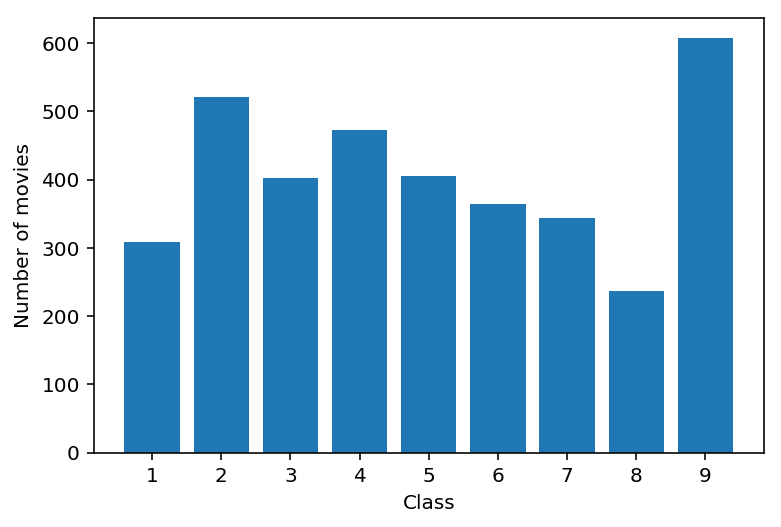

In [130]:
# new histogram of label distribution
bin_classes = [0]*9
for label in data['label']:
    bin_classes[int(label)]+=1
print(bin_classes)
plt.bar(np.arange(9), bin_classes)
plt.xticks(np.arange(9), np.arange(1,10))
plt.xlabel('Class')
plt.ylabel('Number of movies')
plt.show()

In [131]:
# get rid of revenue column
data = data.drop(columns=['revenue'])
data

,adult,budget,release_date,runtime,DirectorHistoryGross,ActorHistoryAverage_Gross,production_history_gross,genre_10752,genre_12,genre_14,...,genre_35,genre_36,genre_99,genre_37,genre_878,genre_9648,genre_53,genre_10749,genre_10751,label
0,0,30000000.0,1995,81.0,1.000000e+00,2.589193e+10,1.000000e+00,0,0,0,...,1,0,0,0,0,0,0,0,1,8
1,0,65000000.0,1995,104.0,6.200000e+07,2.246237e+11,6.871165e+08,0,1,1,...,0,0,0,0,0,0,0,0,1,8
2,0,16000000.0,1995,127.0,1.000000e+00,2.412263e+09,3.642835e+09,0,0,0,...,1,0,0,0,0,0,0,1,0,5
3,0,60000000.0,1995,170.0,7.550586e+07,4.766800e+11,1.989192e+09,0,0,0,...,0,0,0,0,0,0,1,0,0,7
4,0,35000000.0,1995,106.0,1.123830e+08,2.632461e+10,1.608594e+09,0,1,0,...,0,0,0,0,0,0,1,0,0,4
5,0,58000000.0,1995,130.0,1.534000e+07,2.519825e+10,1.146289e+08,0,1,0,...,0,0,0,0,0,0,1,0,0,8
6,0,62000000.0,1995,106.0,3.045170e+08,2.391146e+09,6.478178e+08,0,0,0,...,1,0,0,0,0,0,0,1,0,6
7,0,44000000.0,1995,192.0,2.901052e+08,5.997492e+09,8.105715e+08,0,0,0,...,0,1,0,0,0,0,0,0,0,2
8,0,98000000.0,1995,119.0,2.550002e+08,2.292214e+11,3.894770e+08,0,1,0,...,0,0,0,0,0,0,0,0,0,2
9,0,52000000.0,1995,178.0,2.145554e+08,3.468629e+11,1.179215e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [133]:
# write in for chekcpoint 4
data.to_csv("checkpoint5.csv", index=False)

## Checkpoint 4

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("checkpoint5.csv")
all_data = data.values
#all_data = np.delete(all_data, [0,3], axis=1)

In [4]:
# To matrix
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# normalize budget, release year, runtime, grosses
normalized_values = scaler.fit_transform(all_data[:,1:7])
# stack them together
all_data = np.hstack((all_data[:,:1], normalized_values, all_data[:,7:]))

In [5]:
# split dataset for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_data[:, :-1], all_data[:,-1], 
            test_size=0.2, shuffle=True, random_state=418)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2928, 27)
(2928,)
(733, 27)
(733,)


In [6]:
set(y_train)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

[58, 110, 84, 97, 80, 70, 67, 54, 113]


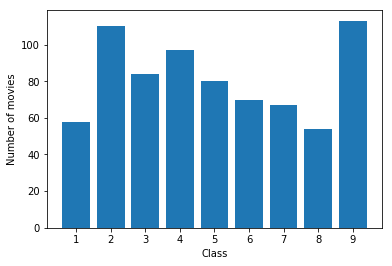

In [7]:
# new histogram of label distribution
bin_classes = [0]*9
for label in y_test:
    bin_classes[int(label)]+=1
print(bin_classes)
plt.bar(np.arange(9), bin_classes)
plt.xticks(np.arange(9), np.arange(1,10))
plt.xlabel('Class')
plt.ylabel('Number of movies')
plt.show()

### SVM

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(C=1, kernel='rbf', gamma='scale', )
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.312 (+/- 0.03)


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    from sklearn.metrics import confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [10]:
def evaluate_confusion(clf):
    from sklearn.metrics import confusion_matrix
    %config InlineBackend.figure_format = 'retina'
    class_names = range(9)
    y_pred = clf.predict(x_test)
    print("Accuracy: {}".format(clf.score(x_test, y_test)))
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # calculate one-away
    one_aways = 0
    for i in range(9):
        sum_ = cnf_matrix[i][i]
        if i-1>0:
            sum_ += cnf_matrix[i-1][i]
        if i+1 < 9:
            sum_ += cnf_matrix[i+1][i]
        one_aways += sum_
    print("One-away Accuracy: {}".format(one_aways/len(y_test)))

Accuracy: 0.3424283765347885
Confusion matrix, without normalization
[[ 1 55  2  0  0  0  0  0  0]
 [ 0 93  5  6  4  1  0  0  1]
 [ 0 42 13 20  4  1  1  0  3]
 [ 0 37  5 28  7 11  4  0  5]
 [ 0 24  5 20 12  3  9  0  7]
 [ 0 21  2 16  6  8  5  0 12]
 [ 0  9  6 10  4 13  4  0 21]
 [ 0  3  4  9  4  8  3  0 23]
 [ 0  5  1  4  1  5  5  0 92]]
One-away Accuracy: 0.5497953615279673


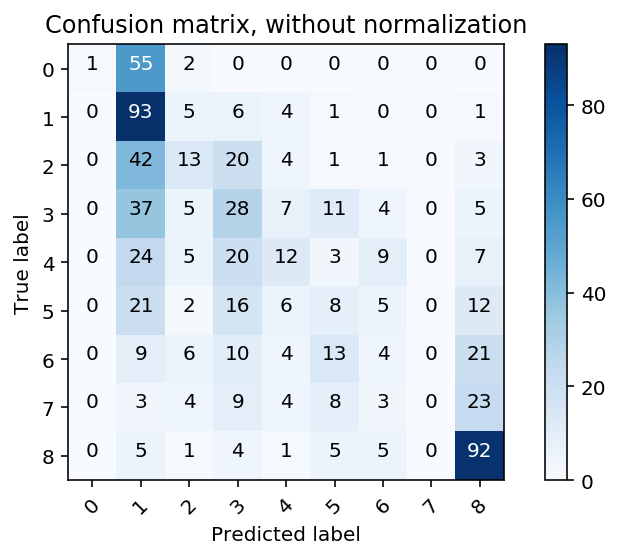

In [11]:
clf.fit(x_train, y_train)
evaluate_confusion(clf)

### Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.8, solver='lbfgs', multi_class='multinomial', max_iter=200)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.307 (+/- 0.03)


In [195]:
clf = LogisticRegression(C=5.0, solver='lbfgs', multi_class='auto', max_iter=400)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.305 (+/- 0.03)


Accuracy: 0.3315143246930423
Confusion matrix, without normalization
[[29 27  1  0  1  0  0  0  0]
 [26 68  6  5  3  1  0  0  1]
 [12 31 10 22  5  2  0  0  2]
 [ 3 36  4 29  9  4  3  1  8]
 [ 1 18  5 24 12  6  5  0  9]
 [ 2 11  6 18 12  3  4  1 13]
 [ 1  6  3 13 10 11  2  1 20]
 [ 0  2  1  8  7  6  5  0 25]
 [ 0  5  0  6  2  6  4  0 90]]
One-away Accuracy: 0.5852660300136425


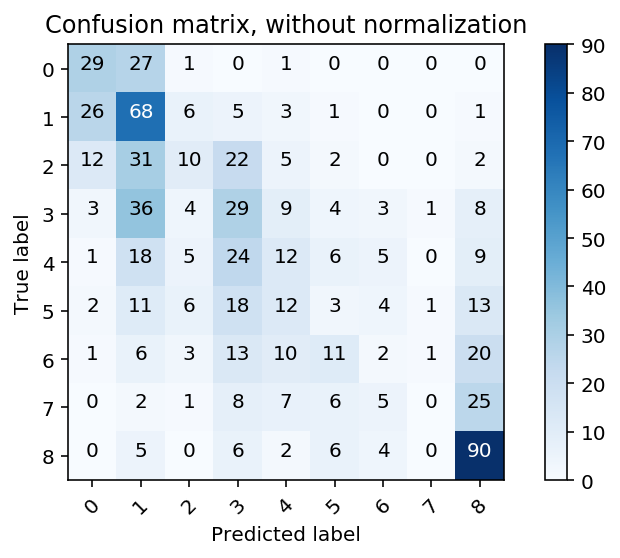

In [196]:
clf.fit(x_train, y_train)
evaluate_confusion(clf)

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, criterion='gini', n_jobs=-1)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.314 (+/- 0.03)


Accuracy: 0.3519781718963165
Confusion matrix, without normalization
[[24 27  4  2  1  0  0  0  0]
 [20 63  9 13  3  1  1  0  0]
 [ 9 24  9 24 11  2  5  0  0]
 [ 1 19 11 35 11  9  5  0  6]
 [ 2  8 15 19 10 10  4  1 11]
 [ 2  7  7 16  9 13  3  4  9]
 [ 1  6  4  8  6 10 13  3 16]
 [ 0  4  3  2  4  8  8  3 22]
 [ 0  4  1  4  4  4  7  1 88]]
One-away Accuracy: 0.6030013642564802


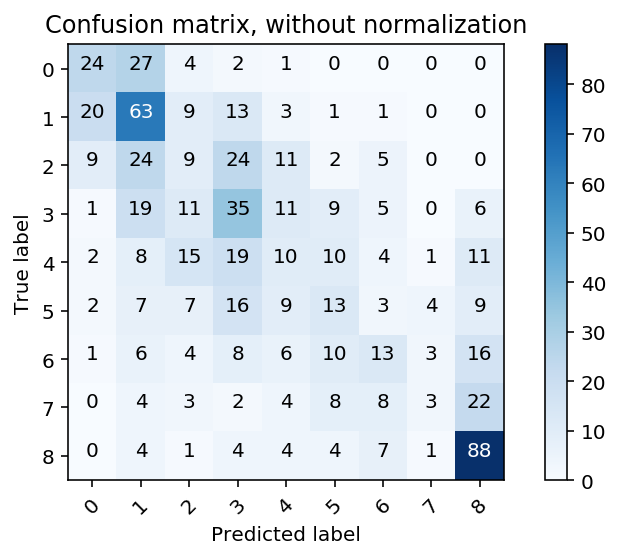

In [17]:
clf.fit(x_train, y_train)
evaluate_confusion(clf)

### Neural Network

In [12]:
# Grid Search CV
import tensorflow as tf
from tensorflow import keras
# create model
params = {'epochs': [20,50,100,200], 'layer1_size': [64, 96, 128], 'layer2_size':[12, 32, 64],
         'training_f': ['adam', 'sgd'], 'lr': [0.01, 0.05, 0.1, 0.5], 'dropout':[0.1, 0.2]}
def create_model(layer1_size=32, layer2_size=12, training_f='adam', lr=0.01,dropout=0.25):
    print("Layersize:({}, {}), training_f: {}, learning rate: {}, dropout: {}".format(
        layer1_size, layer2_size, training_f, lr, dropout))
    model = keras.Sequential([
        keras.layers.Dense(layer1_size, activation=tf.nn.relu, input_shape=(27,)),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(layer2_size, activation=tf.nn.softmax),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(9, activation=tf.nn.relu)
        ])
    opt =keras.optimizers.Adam(lr=lr)
    if training_f=='sgd':
        opt=keras.optimizers.SGD(lr=lr)
    elif training_f=='adamdelta':
        opt=keras.optimizers.Adadelta(lr=lr)
    model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

# create model in a classifier wrapper for sklearn to use GridSearch
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10)

In [13]:
# start grid search cross validation
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, cv=3)
x_train_, x_val_, y_train_, y_val_ = train_test_split(x_train, y_train, 
            test_size=0.2, shuffle=True)
grid_result = grid.fit(x_train_, y_train_, verbose=2)

Layersize:(64, 12), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 1s - loss: 6.0963 - acc: 0.1448
Epoch 2/20
 - 0s - loss: 5.7413 - acc: 0.1544
Epoch 3/20
 - 0s - loss: 5.6912 - acc: 0.1787
Epoch 4/20
 - 0s - loss: 5.8481 - acc: 0.1762
Epoch 5/20
 - 0s - loss: 5.7298 - acc: 0.1140
Epoch 6/20
 - 0s - loss: 5.6389 - acc: 0.1326
Epoch 7/20
 - 0s - loss: 5.3945 - acc: 0.1563
Epoch 8/20
 - 0s - loss: 4.1839 - acc: 0.0967
Epoch 9/20
 - 0s - loss: 3.0316 - acc: 0.0942
Epoch 10/20
 - 0s - loss: 2.9997 - acc: 0.0890
Epoch 11/20
 - 0s - loss: 3.1209 - acc: 0.0858
Epoch 12/20
 - 0s - loss: 3.0452 - acc: 0.0961
Epoch 13/20
 - 0s - loss: 3.1004 - acc: 0.0884
Epoch 14/20
 - 0s - loss: 2.8876 - acc: 0.0929
Epoch 15/20
 - 0s - loss: 2.9548 - acc: 0.0948
Epoch 16/20
 - 0s - loss: 2.7679 - acc: 0.0955
Epoch 17/20
 - 0s - loss: 2.2126 - acc: 0.0922
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.09

Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 26us/step
Layersize:(64, 12), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 0s - loss: 5.7302 - acc: 0.2228
Epoch 2/20
 - 0s - loss: 4.7899 - acc: 0.1421
Epoch 3/20
 - 0s - loss: 2.5620 - acc: 0.0890
Epoch 4/20
 - 0s - loss: 2.5098 - acc: 0.0935
Epoch 5/20
 - 0s - loss: 2.4189 - acc: 0.0883
Epoch 6/20
 - 0s - loss: 2.5157

Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 33us/step
Layersize:(64, 12), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 1s - loss: 8.1015 - acc: 0.1019
Epoch 2/20
 - 0s - loss: 5.5435 - acc: 0.1031
Epoch 3/20
 - 0s - loss: 5.5163 - acc: 0.1031
Epoch 4/20
 - 0s - loss: 5.4845 - acc: 0.1031
Epoch 5/20
 - 0s - loss: 4.1932 - acc: 0.1031
Epoch 6/20
 - 0s - loss: 3.9074 - acc: 0.1031
Epoch 7/20
 - 0s - loss: 3.8723 - acc: 0.1031
Epoch 8/20
 - 0s - loss: 3.8640 - acc: 0.1031
Epoch 9/20
 - 0s - loss: 3.8544 - acc: 0.1031
Epoch 10/20
 - 0s - loss: 3.8675 - acc: 0.1031
Epoch 11/20
 - 0s - loss: 3.8608 - acc: 0.1031
Epoch 12/20
 - 0s - loss: 3.8368 - acc: 0.1031
Epoch 13/20
 - 0s - loss: 3.8416 - acc: 0.1031
Epoch 14/20
 - 0s - loss: 3.8376 - 

1561/1561 [==============================] - 0s 36us/step
Layersize:(64, 12), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 1s - loss: 10.4627 - acc: 0.0948
Epoch 2/20
 - 0s - loss: 9.8913 - acc: 0.0961
Epoch 3/20
 - 0s - loss: 6.9099 - acc: 0.0961
Epoch 4/20
 - 0s - loss: 6.8874 - acc: 0.0961
Epoch 5/20
 - 0s - loss: 6.9014 - acc: 0.0961
Epoch 6/20
 - 0s - loss: 6.8715 - acc: 0.0961
Epoch 7/20
 - 0s - loss: 6.9111 - acc: 0.1384
Epoch 8/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 9/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 10/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 11/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 12/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 13/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 14/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 15/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 16/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 17/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 18/20
 - 0s - loss: 6.9029 - acc: 0.1384
Epoch 19/20
 - 0s - loss: 6.9029 -

Epoch 6/20
 - 0s - loss: 2.9990 - acc: 0.1735
Epoch 7/20
 - 0s - loss: 2.1793 - acc: 0.1761
Epoch 8/20
 - 0s - loss: 2.1854 - acc: 0.1536
Epoch 9/20
 - 0s - loss: 2.1575 - acc: 0.1825
Epoch 10/20
 - 0s - loss: 2.1523 - acc: 0.1895
Epoch 11/20
 - 0s - loss: 2.1496 - acc: 0.1741
Epoch 12/20
 - 0s - loss: 2.1500 - acc: 0.1761
Epoch 13/20
 - 0s - loss: 2.1472 - acc: 0.1818
Epoch 14/20
 - 0s - loss: 2.1440 - acc: 0.1761
Epoch 15/20
 - 0s - loss: 2.1396 - acc: 0.1882
Epoch 16/20
 - 0s - loss: 2.1350 - acc: 0.1837
Epoch 17/20
 - 0s - loss: 2.1217 - acc: 0.1965
Epoch 18/20
 - 0s - loss: 2.1288 - acc: 0.1997
Epoch 19/20
 - 0s - loss: 2.1218 - acc: 0.2157
Epoch 20/20
 - 0s - loss: 2.1127 - acc: 0.2311
1562/1562 [==============================] - 0s 39us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 1s - loss: 4.6585 - acc: 0.1224
Epoch 2/20
 - 0s - loss: 3.0717 - acc: 0.0974
Epoch 3/20
 - 0s - loss: 3.2484 - acc: 0.0948
Epoch 4/20
 - 0s - loss: 3.3511

Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 38us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 1s - loss: 2.6798 - acc: 0.0935
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/20
 - 0s - loss: 2.1972 -

1561/1561 [==============================] - 0s 41us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 1s - loss: 11.9682 - acc: 0.1312
Epoch 2/20
 - 0s - loss: 12.5653 - acc: 0.1332
Epoch 3/20
 - 0s - loss: 12.5627 - acc: 0.1332
Epoch 4/20
 - 0s - loss: 12.5493 - acc: 0.1332
Epoch 5/20
 - 0s - loss: 12.4624 - acc: 0.1332
Epoch 6/20
 - 0s - loss: 12.5098 - acc: 0.1332
Epoch 7/20
 - 0s - loss: 12.5627 - acc: 0.1332
Epoch 8/20
 - 0s - loss: 12.6124 - acc: 0.1332
Epoch 9/20
 - 0s - loss: 12.6432 - acc: 0.1332
Epoch 10/20
 - 0s - loss: 12.7303 - acc: 0.1332
Epoch 11/20
 - 0s - loss: 12.6841 - acc: 0.1332
Epoch 12/20
 - 0s - loss: 12.6390 - acc: 0.1332
Epoch 13/20
 - 0s - loss: 12.7087 - acc: 0.1332
Epoch 14/20
 - 0s - loss: 12.7224 - acc: 0.1332
Epoch 15/20
 - 0s - loss: 12.6922 - acc: 0.1332
Epoch 16/20
 - 0s - loss: 12.7301 - acc: 0.1332
Epoch 17/20
 - 0s - loss: 12.7115 - acc: 0.1332
Epoch 18/20
 - 0s - loss: 12.6976 - acc: 0.1332
Epoch 19/20
 - 0

Epoch 4/20
 - 0s - loss: 2.2006 - acc: 0.0897
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/20
 - 0s - loss: 2.2035 - acc: 0.0903
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 39us/step
Layersize:(64, 64), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 2s - loss: 8.3576 - acc: 0.0673
Epoch 2/20
 - 0s - loss: 8.3200 

Epoch 13/20
 - 0s - loss: 7.7227 - acc: 0.1063
Epoch 14/20
 - 0s - loss: 7.7199 - acc: 0.1063
Epoch 15/20
 - 0s - loss: 7.7167 - acc: 0.1057
Epoch 16/20
 - 0s - loss: 7.7123 - acc: 0.1057
Epoch 17/20
 - 0s - loss: 5.7906 - acc: 0.1063
Epoch 18/20
 - 0s - loss: 5.7027 - acc: 0.1057
Epoch 19/20
 - 0s - loss: 5.6961 - acc: 0.1051
Epoch 20/20
 - 0s - loss: 5.6811 - acc: 0.1051
1561/1561 [==============================] - 0s 41us/step
Layersize:(64, 64), training_f: sgd, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 2s - loss: 2.5643 - acc: 0.0839
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/20
 - 0s - loss: 2.1972 -

1562/1562 [==============================] - 0s 49us/step
Layersize:(64, 64), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 2s - loss: 12.8704 - acc: 0.1710
Epoch 2/20
 - 0s - loss: 13.2423 - acc: 0.1717
Epoch 3/20
 - 0s - loss: 13.2684 - acc: 0.1717
Epoch 4/20
 - 0s - loss: 13.2909 - acc: 0.1717
Epoch 5/20
 - 0s - loss: 13.2570 - acc: 0.1717
Epoch 6/20
 - 0s - loss: 13.2483 - acc: 0.1717
Epoch 7/20
 - 0s - loss: 13.2752 - acc: 0.1717
Epoch 8/20
 - 0s - loss: 13.2571 - acc: 0.1717
Epoch 9/20
 - 0s - loss: 13.2576 - acc: 0.1717
Epoch 10/20
 - 0s - loss: 13.2517 - acc: 0.1717
Epoch 11/20
 - 0s - loss: 13.2167 - acc: 0.1717
Epoch 12/20
 - 0s - loss: 13.2247 - acc: 0.1717
Epoch 13/20
 - 0s - loss: 13.2725 - acc: 0.1717
Epoch 14/20
 - 0s - loss: 13.2531 - acc: 0.1717
Epoch 15/20
 - 0s - loss: 13.2069 - acc: 0.1717
Epoch 16/20
 - 0s - loss: 13.2580 - acc: 0.1717
Epoch 17/20
 - 0s - loss: 13.2410 - acc: 0.1717
Epoch 18/20
 - 0s - loss: 13.2262 - acc: 0.1717
Epoch 19/20
 - 0

Epoch 3/20
 - 0s - loss: 4.7154 - acc: 0.2409
Epoch 4/20
 - 0s - loss: 4.7679 - acc: 0.2447
Epoch 5/20
 - 0s - loss: 4.7686 - acc: 0.2422
Epoch 6/20
 - 0s - loss: 4.4631 - acc: 0.2191
Epoch 7/20
 - 0s - loss: 2.8138 - acc: 0.0916
Epoch 8/20
 - 0s - loss: 2.4702 - acc: 0.0961
Epoch 9/20
 - 0s - loss: 2.4285 - acc: 0.0955
Epoch 10/20
 - 0s - loss: 2.4194 - acc: 0.0935
Epoch 11/20
 - 0s - loss: 2.4222 - acc: 0.0922
Epoch 12/20
 - 0s - loss: 2.4174 - acc: 0.0961
Epoch 13/20
 - 0s - loss: 2.3987 - acc: 0.0955
Epoch 14/20
 - 0s - loss: 2.4941 - acc: 0.0948
Epoch 15/20
 - 0s - loss: 2.6191 - acc: 0.0922
Epoch 16/20
 - 0s - loss: 2.8453 - acc: 0.0922
Epoch 17/20
 - 0s - loss: 2.4981 - acc: 0.0871
Epoch 18/20
 - 0s - loss: 2.1894 - acc: 0.0897
Epoch 19/20
 - 0s - loss: 2.1987 - acc: 0.0884
Epoch 20/20
 - 0s - loss: 2.1907 - acc: 0.0897
1561/1561 [==============================] - 0s 52us/step
Layersize:(96, 12), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 2s - loss: 3.7860

Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 51us/step
Layersize:(96, 12), training_f: sgd, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 3s - loss: 2.9686 - acc: 0.0987
Epoch 2/20
 - 0s - loss: 2.2148 - acc: 0.0903
Epoch 3/20
 - 0s - loss: 2.2033 - acc: 0.0903
Epoch 4/20
 - 0s - loss: 2.2043 - acc: 0.0903
Epoch 5/20
 - 0s - loss: 2.1958 - acc: 0.0910
Epoch 6/20
 - 0s - loss: 2.2021 - acc: 0.0903
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/20
 - 0s - loss: 2.1972 -

 - 0s - loss: 7.6491 - acc: 0.0641
1561/1561 [==============================] - 0s 50us/step
Layersize:(96, 12), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 3s - loss: 6.2409 - acc: 0.1089
Epoch 2/20
 - 0s - loss: 5.7346 - acc: 0.0961
Epoch 3/20
 - 0s - loss: 5.2814 - acc: 0.0961
Epoch 4/20
 - 0s - loss: 4.8706 - acc: 0.0961
Epoch 5/20
 - 0s - loss: 4.1917 - acc: 0.0961
Epoch 6/20
 - 0s - loss: 2.1880 - acc: 0.0961
Epoch 7/20
 - 0s - loss: 2.1592 - acc: 0.0961
Epoch 8/20
 - 0s - loss: 2.1237 - acc: 0.0961
Epoch 9/20
 - 0s - loss: 2.0656 - acc: 0.0961
Epoch 10/20
 - 0s - loss: 2.0736 - acc: 0.0961
Epoch 11/20
 - 0s - loss: 2.0750 - acc: 0.0961
Epoch 12/20
 - 0s - loss: 2.0593 - acc: 0.0961
Epoch 13/20
 - 0s - loss: 2.0628 - acc: 0.0961
Epoch 14/20
 - 0s - loss: 2.0821 - acc: 0.0961
Epoch 15/20
 - 0s - loss: 2.0525 - acc: 0.0961
Epoch 16/20
 - 0s - loss: 2.0682 - acc: 0.0961
Epoch 17/20
 - 0s - loss: 2.1360 - acc: 0.0961
Epoch 18/20
 - 0s - loss: 2.0725 - acc: 0.0961


Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 51us/step
Layersize:(96, 32), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 3s - loss: 2.5771 - acc: 0.0890
Epoch 2/20
 - 0s - loss: 2.2031

Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 55us/step
Layersize:(96, 32), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 3s - loss: 2.6779 - acc: 0.0916
Epoch 2/20
 - 0s - loss: 2.3611 - acc: 0.0897
Epoch 3/20
 - 0s - loss: 2.2027 - acc: 0.0884
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/20
 - 0s - loss: 2.1972 

1561/1561 [==============================] - 0s 58us/step
Layersize:(96, 32), training_f: adam, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 4s - loss: 5.8616 - acc: 0.1063
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/20
 - 0s - loss: 2.1972 -

 - 0s - loss: 8.0941 - acc: 0.0987
Epoch 5/20
 - 0s - loss: 8.0885 - acc: 0.1006
Epoch 6/20
 - 0s - loss: 8.0831 - acc: 0.0987
Epoch 7/20
 - 0s - loss: 8.0819 - acc: 0.0967
Epoch 8/20
 - 0s - loss: 8.0993 - acc: 0.1006
Epoch 9/20
 - 0s - loss: 8.1248 - acc: 0.1019
Epoch 10/20
 - 0s - loss: 8.1248 - acc: 0.1025
Epoch 11/20
 - 0s - loss: 8.1248 - acc: 0.1031
Epoch 12/20
 - 0s - loss: 8.1248 - acc: 0.1019
Epoch 13/20
 - 0s - loss: 8.1248 - acc: 0.1038
Epoch 14/20
 - 0s - loss: 8.1248 - acc: 0.1019
Epoch 15/20
 - 0s - loss: 8.1248 - acc: 0.1025
Epoch 16/20
 - 0s - loss: 8.1248 - acc: 0.1025
Epoch 17/20
 - 0s - loss: 8.1248 - acc: 0.1025
Epoch 18/20
 - 0s - loss: 8.1248 - acc: 0.1025
Epoch 19/20
 - 0s - loss: 8.1248 - acc: 0.1025
Epoch 20/20
 - 0s - loss: 8.1248 - acc: 0.1031
1561/1561 [==============================] - 0s 60us/step
Layersize:(96, 32), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 4s - loss: 8.0569 - acc: 0.1608
Epoch 2/20
 - 0s - loss: 7.7848 - acc: 0.172

 - 0s - loss: 5.9450 - acc: 0.1300
Epoch 13/20
 - 0s - loss: 5.9441 - acc: 0.1300
Epoch 14/20
 - 0s - loss: 5.9440 - acc: 0.1300
Epoch 15/20
 - 0s - loss: 5.9442 - acc: 0.1300
Epoch 16/20
 - 0s - loss: 5.9433 - acc: 0.1300
Epoch 17/20
 - 0s - loss: 5.9441 - acc: 0.1300
Epoch 18/20
 - 0s - loss: 5.9433 - acc: 0.1300
Epoch 19/20
 - 0s - loss: 5.9438 - acc: 0.1300
Epoch 20/20
 - 0s - loss: 5.9425 - acc: 0.1300
1561/1561 [==============================] - 0s 63us/step
Layersize:(96, 64), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 4s - loss: 4.1582 - acc: 0.1364
Epoch 2/20
 - 0s - loss: 3.3492 - acc: 0.1421
Epoch 3/20
 - 0s - loss: 3.3274 - acc: 0.1588
Epoch 4/20
 - 0s - loss: 3.3104 - acc: 0.1735
Epoch 5/20
 - 0s - loss: 3.2892 - acc: 0.1748
Epoch 6/20
 - 0s - loss: 3.2669 - acc: 0.1722
Epoch 7/20
 - 0s - loss: 3.2646 - acc: 0.1594
Epoch 8/20
 - 0s - loss: 3.2658 - acc: 0.1658
Epoch 9/20
 - 0s - loss: 3.3131 - acc: 0.1338
Epoch 10/20
 - 0s - loss: 3.2550 - acc: 0.1729

 - 0s - loss: 6.4058 - acc: 0.1069
1562/1562 [==============================] - 0s 66us/step
Layersize:(96, 64), training_f: adam, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 5s - loss: 4.6803 - acc: 0.0929
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0903

Epoch 4/20
 - 0s - loss: 10.5025 - acc: 0.1063
Epoch 5/20
 - 0s - loss: 10.5278 - acc: 0.1031
Epoch 6/20
 - 0s - loss: 10.5745 - acc: 0.1031
Epoch 7/20
 - 0s - loss: 10.5068 - acc: 0.1070
Epoch 8/20
 - 0s - loss: 10.6158 - acc: 0.1006
Epoch 9/20
 - 0s - loss: 10.6023 - acc: 0.0999
Epoch 10/20
 - 0s - loss: 10.5652 - acc: 0.1031
Epoch 11/20
 - 0s - loss: 10.5265 - acc: 0.1038
Epoch 12/20
 - 0s - loss: 10.5993 - acc: 0.0999
Epoch 13/20
 - 0s - loss: 10.4623 - acc: 0.1057
Epoch 14/20
 - 0s - loss: 10.5250 - acc: 0.0961
Epoch 15/20
 - 0s - loss: 10.4837 - acc: 0.1108
Epoch 16/20
 - 0s - loss: 10.5586 - acc: 0.0961
Epoch 17/20
 - 0s - loss: 10.5811 - acc: 0.1025
Epoch 18/20
 - 0s - loss: 10.5569 - acc: 0.1025
Epoch 19/20
 - 0s - loss: 10.5123 - acc: 0.1076
Epoch 20/20
 - 0s - loss: 10.5472 - acc: 0.1012
1561/1561 [==============================] - 0s 63us/step
Layersize:(96, 64), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 5s - loss: 3.8497 - acc: 0.0922
Epoch 2/20
 - 0

Epoch 12/20
 - 0s - loss: 1.9372 - acc: 0.2996
Epoch 13/20
 - 0s - loss: 1.8981 - acc: 0.2996
Epoch 14/20
 - 0s - loss: 1.8842 - acc: 0.3028
Epoch 15/20
 - 0s - loss: 1.8841 - acc: 0.2990
Epoch 16/20
 - 0s - loss: 1.9143 - acc: 0.3169
Epoch 17/20
 - 0s - loss: 1.8641 - acc: 0.3316
Epoch 18/20
 - 0s - loss: 1.8999 - acc: 0.3259
Epoch 19/20
 - 0s - loss: 1.8508 - acc: 0.3380
Epoch 20/20
 - 0s - loss: 1.8537 - acc: 0.3271
1562/1562 [==============================] - 0s 71us/step
Layersize:(128, 12), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 5s - loss: 4.3408 - acc: 0.1422
Epoch 2/20
 - 0s - loss: 3.8504 - acc: 0.1480
Epoch 3/20
 - 0s - loss: 3.7937 - acc: 0.1710
Epoch 4/20
 - 0s - loss: 3.6918 - acc: 0.1602
Epoch 5/20
 - 0s - loss: 2.1792 - acc: 0.1634
Epoch 6/20
 - 0s - loss: 2.1574 - acc: 0.1710
Epoch 7/20
 - 0s - loss: 2.1406 - acc: 0.1762
Epoch 8/20
 - 0s - loss: 2.1357 - acc: 0.1755
Epoch 9/20
 - 0s - loss: 2.1256 - acc: 0.1800
Epoch 10/20
 - 0s - loss: 2.1283 

Epoch 20/20
 - 0s - loss: 2.0912 - acc: 0.1454
1561/1561 [==============================] - 0s 93us/step
Layersize:(128, 12), training_f: sgd, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 5s - loss: 5.0269 - acc: 0.1499
Epoch 2/20
 - 0s - loss: 4.3545 - acc: 0.2172
Epoch 3/20
 - 0s - loss: 3.8538 - acc: 0.1121
Epoch 4/20
 - 0s - loss: 3.5692 - acc: 0.0884
Epoch 5/20
 - 0s - loss: 3.5423 - acc: 0.0884
Epoch 6/20
 - 0s - loss: 3.5325 - acc: 0.0884
Epoch 7/20
 - 0s - loss: 3.5236 - acc: 0.0884
Epoch 8/20
 - 0s - loss: 3.4962 - acc: 0.0884
Epoch 9/20
 - 0s - loss: 3.5007 - acc: 0.1288
Epoch 10/20
 - 0s - loss: 3.4856 - acc: 0.0916
Epoch 11/20
 - 0s - loss: 3.4825 - acc: 0.0980
Epoch 12/20
 - 0s - loss: 3.4570 - acc: 0.0974
Epoch 13/20
 - 0s - loss: 3.4810 - acc: 0.0935
Epoch 14/20
 - 0s - loss: 3.4610 - acc: 0.0884
Epoch 15/20
 - 0s - loss: 3.4730 - acc: 0.0897
Epoch 16/20
 - 0s - loss: 3.4868 - acc: 0.0884
Epoch 17/20
 - 0s - loss: 3.4633 - acc: 0.0884
Epoch 18/20
 - 0s - loss: 3.4629 

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/20
 - 0s - loss: 2.2035 - acc: 0.0826
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 81us/step
Layersize:(128, 12), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 6s - loss: 2.5225 - acc: 0.0929
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0

 - 0s - loss: 1.8761 - acc: 0.3293
Epoch 12/20
 - 0s - loss: 1.8292 - acc: 0.3216
Epoch 13/20
 - 0s - loss: 1.8368 - acc: 0.3088
Epoch 14/20
 - 0s - loss: 1.8670 - acc: 0.3139
Epoch 15/20
 - 0s - loss: 1.8316 - acc: 0.3267
Epoch 16/20
 - 0s - loss: 1.8049 - acc: 0.3325
Epoch 17/20
 - 0s - loss: 1.8485 - acc: 0.2998
Epoch 18/20
 - 0s - loss: 1.8723 - acc: 0.3165
Epoch 19/20
 - 0s - loss: 1.8353 - acc: 0.3152
Epoch 20/20
 - 0s - loss: 1.8372 - acc: 0.3222
1561/1561 [==============================] - 0s 83us/step
Layersize:(128, 32), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/20
 - 6s - loss: 3.4112 - acc: 0.1288
Epoch 2/20
 - 0s - loss: 2.2030 - acc: 0.0884
Epoch 3/20
 - 0s - loss: 2.2048 - acc: 0.0884
Epoch 4/20
 - 0s - loss: 2.1958 - acc: 0.0890
Epoch 5/20
 - 0s - loss: 2.1958 - acc: 0.0890
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/20
 - 0s - loss: 2.2096 - acc: 0.0884
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.08

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - ETA:  - 0s 87us/step
Layersize:(128, 32), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 6s - loss: 4.5953 - acc: 0.1018
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/20
 - 0s - loss: 2.1972 - a

 - 0s - loss: 10.9676 - acc: 0.0903
Epoch 4/20
 - 0s - loss: 11.0191 - acc: 0.1102
Epoch 5/20
 - 0s - loss: 11.1873 - acc: 0.1717
Epoch 6/20
 - 0s - loss: 11.1870 - acc: 0.1717
Epoch 7/20
 - 0s - loss: 11.1871 - acc: 0.1717
Epoch 8/20
 - 0s - loss: 11.1855 - acc: 0.1717
Epoch 9/20
 - 0s - loss: 11.1844 - acc: 0.1717
Epoch 10/20
 - 0s - loss: 11.1891 - acc: 0.1717
Epoch 11/20
 - 0s - loss: 11.1854 - acc: 0.1717
Epoch 12/20
 - 0s - loss: 11.1851 - acc: 0.1717
Epoch 13/20
 - 0s - loss: 11.1847 - acc: 0.1717
Epoch 14/20
 - 0s - loss: 11.1846 - acc: 0.1717
Epoch 15/20
 - 0s - loss: 11.1821 - acc: 0.1717
Epoch 16/20
 - 0s - loss: 11.1853 - acc: 0.1717
Epoch 17/20
 - 0s - loss: 11.1827 - acc: 0.1717
Epoch 18/20
 - 0s - loss: 11.1821 - acc: 0.1717
Epoch 19/20
 - 0s - loss: 10.3391 - acc: 0.1717
Epoch 20/20
 - 0s - loss: 9.8420 - acc: 0.1717
1561/1561 [==============================] - 0s 96us/step
Layersize:(128, 32), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 7s - loss: 5

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 91us/step
Layersize:(128, 32), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 7s - loss: 13.7694 - acc: 0.1338
Epoch 2/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 3/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 4/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 5/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 6/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 7/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 8/20
 - 0s - loss: 13.9718 - acc: 0.1332
Epoch 9/20
 - 0s - loss: 13.9718 - ac

Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 103us/step
Layersize:(128, 64), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/20
 - 8s - loss: 5.5280 - acc: 0.1416
Epoch 2/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/20
 - 0s - loss: 2.197

Epoch 3/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/20
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/20
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 98us/step
Layersize:(128, 64), training_f: adam, learning rate: 0.1, dropout: 0.1
Epoch 1/20
 - 8s - loss: 2.5989

 - 0s - loss: 10.1385 - acc: 0.1511
Epoch 11/20
 - 0s - loss: 10.1929 - acc: 0.1492
Epoch 12/20
 - 0s - loss: 10.1741 - acc: 0.1434
Epoch 13/20
 - 0s - loss: 10.2220 - acc: 0.1376
Epoch 14/20
 - 0s - loss: 10.1656 - acc: 0.1447
Epoch 15/20
 - 0s - loss: 10.1524 - acc: 0.1408
Epoch 16/20
 - 0s - loss: 10.2120 - acc: 0.1428
Epoch 17/20
 - 0s - loss: 10.2342 - acc: 0.1479
Epoch 18/20
 - 0s - loss: 10.0828 - acc: 0.1421
Epoch 19/20
 - 0s - loss: 10.1537 - acc: 0.1460
Epoch 20/20
 - 0s - loss: 10.2044 - acc: 0.1402
1562/1562 [==============================] - 0s 72us/step
Layersize:(128, 64), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/20
 - 9s - loss: 11.6409 - acc: 0.1454
Epoch 2/20
 - 0s - loss: 11.7339 - acc: 0.1422
Epoch 3/20
 - 0s - loss: 11.7339 - acc: 0.1422
Epoch 4/20
 - 0s - loss: 10.9923 - acc: 0.1422
Epoch 5/20
 - 0s - loss: 10.5657 - acc: 0.1422
Epoch 6/20
 - 0s - loss: 10.5657 - acc: 0.1422
Epoch 7/20
 - 0s - loss: 10.5657 - acc: 0.1422
Epoch 8/20
 - 0s - loss: 1

Epoch 35/50
 - 0s - loss: 2.6032 - acc: 0.0890
Epoch 36/50
 - 0s - loss: 2.5661 - acc: 0.0897
Epoch 37/50
 - 0s - loss: 2.6685 - acc: 0.0814
Epoch 38/50
 - 0s - loss: 2.5727 - acc: 0.0852
Epoch 39/50
 - 0s - loss: 2.6186 - acc: 0.0942
Epoch 40/50
 - 0s - loss: 2.8071 - acc: 0.0942
Epoch 41/50
 - 0s - loss: 3.1998 - acc: 0.0871
Epoch 42/50
 - 0s - loss: 3.1220 - acc: 0.0903
Epoch 43/50
 - 0s - loss: 3.1249 - acc: 0.0858
Epoch 44/50
 - 0s - loss: 3.0700 - acc: 0.0903
Epoch 45/50
 - 0s - loss: 3.0663 - acc: 0.0948
Epoch 46/50
 - 0s - loss: 3.0929 - acc: 0.0878
Epoch 47/50
 - 0s - loss: 3.0145 - acc: 0.0929
Epoch 48/50
 - 0s - loss: 3.3172 - acc: 0.0865
Epoch 49/50
 - 0s - loss: 3.1702 - acc: 0.0948
Epoch 50/50
 - 0s - loss: 3.1413 - acc: 0.0820
1561/1561 [==============================] - 0s 79us/step
Layersize:(64, 12), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 9s - loss: 5.3475 - acc: 0.1498
Epoch 2/50
 - 0s - loss: 2.1958 - acc: 0.0832
Epoch 3/50
 - 0s - loss: 2

 - 0s - loss: 6.2130 - acc: 0.1300
Epoch 49/50
 - 0s - loss: 6.1554 - acc: 0.1300
Epoch 50/50
 - 0s - loss: 6.1468 - acc: 0.1300
1561/1561 [==============================] - 0s 77us/step
Layersize:(64, 12), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 9s - loss: 2.4217 - acc: 0.1626
Epoch 2/50
 - 0s - loss: 2.1882 - acc: 0.1748
Epoch 3/50
 - 0s - loss: 2.1643 - acc: 0.1748
Epoch 4/50
 - 0s - loss: 2.1452 - acc: 0.1754
Epoch 5/50
 - 0s - loss: 2.1409 - acc: 0.1799
Epoch 6/50
 - 0s - loss: 2.1355 - acc: 0.1825
Epoch 7/50
 - 0s - loss: 2.1320 - acc: 0.1882
Epoch 8/50
 - 0s - loss: 2.1249 - acc: 0.1985
Epoch 9/50
 - 0s - loss: 2.1222 - acc: 0.2023
Epoch 10/50
 - 0s - loss: 2.1199 - acc: 0.2042
Epoch 11/50
 - 0s - loss: 2.1219 - acc: 0.2305
Epoch 12/50
 - 0s - loss: 2.1063 - acc: 0.2254
Epoch 13/50
 - 0s - loss: 2.0970 - acc: 0.2503
Epoch 14/50
 - 0s - loss: 2.0964 - acc: 0.2490
Epoch 15/50
 - 0s - loss: 2.0883 - acc: 0.2586
Epoch 16/50
 - 0s - loss: 2.0742 - acc: 0.2682

Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 

 - 0s - loss: 1.9795 - acc: 0.1069
Epoch 22/50
 - 0s - loss: 2.0007 - acc: 0.1095
Epoch 23/50
 - 0s - loss: 2.0175 - acc: 0.1588
Epoch 24/50
 - 0s - loss: 2.0296 - acc: 0.1748
Epoch 25/50
 - 0s - loss: 2.0222 - acc: 0.1748
Epoch 26/50
 - 0s - loss: 2.0119 - acc: 0.1754
Epoch 27/50
 - 0s - loss: 2.0029 - acc: 0.1767
Epoch 28/50
 - 0s - loss: 2.0123 - acc: 0.1767
Epoch 29/50
 - 0s - loss: 1.9968 - acc: 0.1780
Epoch 30/50
 - 0s - loss: 2.0097 - acc: 0.1786
Epoch 31/50
 - 0s - loss: 1.9890 - acc: 0.1850
Epoch 32/50
 - 0s - loss: 2.0036 - acc: 0.1812
Epoch 33/50
 - 0s - loss: 1.9913 - acc: 0.1844
Epoch 34/50
 - 0s - loss: 1.9896 - acc: 0.1901
Epoch 35/50
 - 0s - loss: 2.0121 - acc: 0.1876
Epoch 36/50
 - 0s - loss: 1.9733 - acc: 0.1863
Epoch 37/50
 - 0s - loss: 1.9980 - acc: 0.1933
Epoch 38/50
 - 0s - loss: 1.9835 - acc: 0.1908
Epoch 39/50
 - 0s - loss: 1.9748 - acc: 0.1908
Epoch 40/50
 - 0s - loss: 1.9866 - acc: 0.1933
Epoch 41/50
 - 0s - loss: 1.9885 - acc: 0.1895
Epoch 42/50
 - 0s - loss:

Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 107us/step
Layersize:(64, 12), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/50
 - 10s - loss: 8.1845 - acc: 0.1057
Epoch 2/50
 - 0s - loss: 8.0865 - acc: 0.1057
Epoch 3/50
 - 0s - loss: 8

Epoch 49/50
 - 0s - loss: 5.4319 - acc: 0.0691
Epoch 50/50
 - 0s - loss: 5.4128 - acc: 0.0691
1562/1562 [==============================] - 0s 88us/step
Layersize:(64, 12), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 10s - loss: 2.5882 - acc: 0.0942
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/50
 - 0s - loss: 2.1972 

 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 8/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 9/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 10/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 11/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 12/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 13/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 14/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 15/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 16/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 17/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 18/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 19/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 20/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 21/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 22/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 23/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 24/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 25/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 26/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 27/50
 - 0s - loss: 10.4948 - acc: 0.1422
Epoch 

Epoch 19/50
 - 0s - loss: 1.8477 - acc: 0.3498
Epoch 20/50
 - 0s - loss: 1.9379 - acc: 0.2607
Epoch 21/50
 - 0s - loss: 1.9248 - acc: 0.2761
Epoch 22/50
 - 0s - loss: 1.9258 - acc: 0.2908
Epoch 23/50
 - 0s - loss: 1.9259 - acc: 0.2960
Epoch 24/50
 - 0s - loss: 1.9198 - acc: 0.2864
Epoch 25/50
 - 0s - loss: 1.8873 - acc: 0.2889
Epoch 26/50
 - 0s - loss: 1.8532 - acc: 0.3158
Epoch 27/50
 - 0s - loss: 1.8124 - acc: 0.3145
Epoch 28/50
 - 0s - loss: 1.8258 - acc: 0.3190
Epoch 29/50
 - 0s - loss: 1.8463 - acc: 0.3261
Epoch 30/50
 - 0s - loss: 1.8781 - acc: 0.3158
Epoch 31/50
 - 0s - loss: 1.9639 - acc: 0.2338
Epoch 32/50
 - 0s - loss: 1.8980 - acc: 0.2639
Epoch 33/50
 - 0s - loss: 1.8669 - acc: 0.2761
Epoch 34/50
 - 0s - loss: 1.8741 - acc: 0.2832
Epoch 35/50
 - 0s - loss: 1.9669 - acc: 0.2620
Epoch 36/50
 - 0s - loss: 1.8932 - acc: 0.2864
Epoch 37/50
 - 0s - loss: 2.0740 - acc: 0.2819
Epoch 38/50
 - 0s - loss: 1.9441 - acc: 0.2473
Epoch 39/50
 - 0s - loss: 1.9041 - acc: 0.2678
Epoch 40/50
 

Epoch 33/50
 - 0s - loss: 2.1735 - acc: 0.1095
Epoch 34/50
 - 0s - loss: 2.1729 - acc: 0.1095
Epoch 35/50
 - 0s - loss: 2.1726 - acc: 0.1095
Epoch 36/50
 - 0s - loss: 2.1724 - acc: 0.1095
Epoch 37/50
 - 0s - loss: 2.1713 - acc: 0.1095
Epoch 38/50
 - 0s - loss: 2.1715 - acc: 0.1095
Epoch 39/50
 - 0s - loss: 2.1712 - acc: 0.1095
Epoch 40/50
 - 0s - loss: 2.1707 - acc: 0.1095
Epoch 41/50
 - 0s - loss: 2.1718 - acc: 0.1095
Epoch 42/50
 - 0s - loss: 2.1709 - acc: 0.1095
Epoch 43/50
 - 0s - loss: 2.1708 - acc: 0.1095
Epoch 44/50
 - 0s - loss: 2.1704 - acc: 0.1095
Epoch 45/50
 - 0s - loss: 2.1705 - acc: 0.1095
Epoch 46/50
 - 0s - loss: 2.1706 - acc: 0.1095
Epoch 47/50
 - 0s - loss: 2.1706 - acc: 0.1095
Epoch 48/50
 - 0s - loss: 2.1707 - acc: 0.1095
Epoch 49/50
 - 0s - loss: 2.1700 - acc: 0.1095
Epoch 50/50
 - 0s - loss: 2.1697 - acc: 0.1095
1561/1561 [==============================] - 0s 82us/step
Layersize:(64, 32), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 10s - loss:

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 81us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/50
 - 10s - loss: 3.0197 - acc: 0.0929
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.08

Epoch 6/50
 - 0s - loss: 4.9118 - acc: 0.0961
Epoch 7/50
 - 0s - loss: 4.8908 - acc: 0.0961
Epoch 8/50
 - 0s - loss: 4.8865 - acc: 0.0961
Epoch 9/50
 - 0s - loss: 4.8668 - acc: 0.0961
Epoch 10/50
 - 0s - loss: 4.8611 - acc: 0.0961
Epoch 11/50
 - 0s - loss: 4.8712 - acc: 0.0961
Epoch 12/50
 - 0s - loss: 4.8601 - acc: 0.0961
Epoch 13/50
 - 0s - loss: 4.8939 - acc: 0.0961
Epoch 14/50
 - 0s - loss: 4.9162 - acc: 0.0961
Epoch 15/50
 - 0s - loss: 4.9005 - acc: 0.0961
Epoch 16/50
 - 0s - loss: 4.9077 - acc: 0.0961
Epoch 17/50
 - 0s - loss: 4.9048 - acc: 0.0961
Epoch 18/50
 - 0s - loss: 4.9021 - acc: 0.0961
Epoch 19/50
 - 0s - loss: 4.8960 - acc: 0.0961
Epoch 20/50
 - 0s - loss: 4.9281 - acc: 0.0961
Epoch 21/50
 - 0s - loss: 4.9490 - acc: 0.0961
Epoch 22/50
 - 0s - loss: 4.9416 - acc: 0.0961
Epoch 23/50
 - 0s - loss: 4.9361 - acc: 0.0961
Epoch 24/50
 - 0s - loss: 4.9340 - acc: 0.0961
Epoch 25/50
 - 0s - loss: 4.9118 - acc: 0.0961
Epoch 26/50
 - 0s - loss: 4.8914 - acc: 0.0961
Epoch 27/50
 - 0s

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/50
 - 0s - loss: 2.2052 - acc: 0.0884
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss:

 - 0s - loss: 9.0970 - acc: 0.0987
Epoch 32/50
 - 0s - loss: 9.1372 - acc: 0.0987
Epoch 33/50
 - 0s - loss: 9.1006 - acc: 0.0987
Epoch 34/50
 - 0s - loss: 9.0994 - acc: 0.0987
Epoch 35/50
 - 0s - loss: 9.0973 - acc: 0.0987
Epoch 36/50
 - 0s - loss: 9.0957 - acc: 0.0987
Epoch 37/50
 - 0s - loss: 9.0953 - acc: 0.0987
Epoch 38/50
 - 0s - loss: 9.0971 - acc: 0.0987
Epoch 39/50
 - 0s - loss: 9.1014 - acc: 0.0987
Epoch 40/50
 - 0s - loss: 9.1117 - acc: 0.0987
Epoch 41/50
 - 0s - loss: 9.0902 - acc: 0.0987
Epoch 42/50
 - 0s - loss: 9.1032 - acc: 0.0987
Epoch 43/50
 - 0s - loss: 9.0944 - acc: 0.0987
Epoch 44/50
 - 0s - loss: 9.0965 - acc: 0.0987
Epoch 45/50
 - 0s - loss: 9.0909 - acc: 0.0987
Epoch 46/50
 - 0s - loss: 9.1003 - acc: 0.0987
Epoch 47/50
 - 0s - loss: 9.0923 - acc: 0.0987
Epoch 48/50
 - 0s - loss: 9.0918 - acc: 0.0987
Epoch 49/50
 - 0s - loss: 9.1373 - acc: 0.0987
Epoch 50/50
 - 0s - loss: 9.0958 - acc: 0.0987
1561/1561 [==============================] - 0s 91us/step
Layersize:(64,

Epoch 43/50
 - 0s - loss: 12.3715 - acc: 0.1723
Epoch 44/50
 - 0s - loss: 12.3700 - acc: 0.1723
Epoch 45/50
 - 0s - loss: 12.3620 - acc: 0.1723
Epoch 46/50
 - 0s - loss: 12.3656 - acc: 0.1723
Epoch 47/50
 - 0s - loss: 12.4123 - acc: 0.1723
Epoch 48/50
 - 0s - loss: 12.3284 - acc: 0.1723
Epoch 49/50
 - 0s - loss: 12.3950 - acc: 0.1723
Epoch 50/50
 - 0s - loss: 12.3493 - acc: 0.1723
1561/1561 [==============================] - 0s 111us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 11s - loss: 13.6964 - acc: 0.1319
Epoch 2/50
 - 0s - loss: 13.9369 - acc: 0.1332
Epoch 3/50
 - 0s - loss: 13.8665 - acc: 0.1332
Epoch 4/50
 - 0s - loss: 13.9131 - acc: 0.1332
Epoch 5/50
 - 0s - loss: 13.8526 - acc: 0.1332
Epoch 6/50
 - 0s - loss: 13.8759 - acc: 0.1332
Epoch 7/50
 - 0s - loss: 13.9397 - acc: 0.1332
Epoch 8/50
 - 0s - loss: 13.9204 - acc: 0.1332
Epoch 9/50
 - 0s - loss: 13.8874 - acc: 0.1332
Epoch 10/50
 - 0s - loss: 13.9127 - acc: 0.1332
Epoch 11/50
 -

Epoch 1/50
 - 12s - loss: 9.3043 - acc: 0.1101
Epoch 2/50
 - 0s - loss: 8.9833 - acc: 0.1088
Epoch 3/50
 - 0s - loss: 9.4199 - acc: 0.1088
Epoch 4/50
 - 0s - loss: 9.2604 - acc: 0.1050
Epoch 5/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 6/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 7/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 8/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 9/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 10/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 11/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 12/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 13/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 14/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 15/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 16/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 17/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 18/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 19/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 20/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 21/50
 - 0s - loss: 9.0635 - acc: 0.1069
Epoch 22/50
 - 0s - l

Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 36/50
 

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 48/50
 - 0s - loss: 2.2040 - acc: 0.0826
Epoch 49/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 137us/step
Layersize:(64, 64), training_f: sgd, learning rate: 0.05, dropout: 0.1
Epoch 1/50
 - 12s - loss: 2.7045 - acc: 0.0916
Epoch 2/50
 - 0s - loss: 2.1944 - acc: 0.0916
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 4/50
 - 0s - loss: 2.2027 - acc: 0.0903
Epoch 5/50
 - 0s - loss: 2.1944 - acc: 0.0916
Epoch 6/50
 - 0s - loss: 2.1944 - acc: 0.0916
Epoch 7/50
 - 0s - loss: 2.1944 - acc: 0.0916
Epoch 8/50
 - 0s - loss: 2.1944 - acc: 0.0916
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.09

Epoch 1/50
 - 12s - loss: 3.3417 - acc: 0.1012
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 22/50
 - 0s - l

 - 0s - loss: 6.5880 - acc: 0.1717
Epoch 15/50
 - 0s - loss: 6.6435 - acc: 0.1717
Epoch 16/50
 - 0s - loss: 6.5861 - acc: 0.1717
Epoch 17/50
 - 0s - loss: 6.5834 - acc: 0.1717
Epoch 18/50
 - 0s - loss: 6.6330 - acc: 0.1717
Epoch 19/50
 - 0s - loss: 6.6435 - acc: 0.1717
Epoch 20/50
 - 0s - loss: 6.6470 - acc: 0.1717
Epoch 21/50
 - 0s - loss: 6.6431 - acc: 0.1717
Epoch 22/50
 - 0s - loss: 6.6419 - acc: 0.1717
Epoch 23/50
 - 0s - loss: 6.6472 - acc: 0.1717
Epoch 24/50
 - 0s - loss: 6.6195 - acc: 0.1717
Epoch 25/50
 - 0s - loss: 6.6213 - acc: 0.1717
Epoch 26/50
 - 0s - loss: 6.6247 - acc: 0.1717
Epoch 27/50
 - 0s - loss: 6.6270 - acc: 0.1717
Epoch 28/50
 - 0s - loss: 6.6309 - acc: 0.1717
Epoch 29/50
 - 0s - loss: 6.6152 - acc: 0.1717
Epoch 30/50
 - 0s - loss: 6.6198 - acc: 0.1717
Epoch 31/50
 - 0s - loss: 6.6306 - acc: 0.1717
Epoch 32/50
 - 0s - loss: 6.6384 - acc: 0.1717
Epoch 33/50
 - 0s - loss: 6.6570 - acc: 0.1717
Epoch 34/50
 - 0s - loss: 6.6435 - acc: 0.1717
Epoch 35/50
 - 0s - loss:

Epoch 27/50
 - 0s - loss: 12.6928 - acc: 0.1422
Epoch 28/50
 - 0s - loss: 12.6233 - acc: 0.1422
Epoch 29/50
 - 0s - loss: 12.7027 - acc: 0.1422
Epoch 30/50
 - 0s - loss: 12.6766 - acc: 0.1422
Epoch 31/50
 - 0s - loss: 12.7360 - acc: 0.1422
Epoch 32/50
 - 0s - loss: 12.7063 - acc: 0.1422
Epoch 33/50
 - 0s - loss: 12.6969 - acc: 0.1422
Epoch 34/50
 - 0s - loss: 12.6811 - acc: 0.1422
Epoch 35/50
 - 0s - loss: 12.5810 - acc: 0.1422
Epoch 36/50
 - 0s - loss: 12.6622 - acc: 0.1422
Epoch 37/50
 - 0s - loss: 12.6462 - acc: 0.1422
Epoch 38/50
 - 0s - loss: 12.7324 - acc: 0.1422
Epoch 39/50
 - 0s - loss: 12.7099 - acc: 0.1422
Epoch 40/50
 - 0s - loss: 12.6547 - acc: 0.1422
Epoch 41/50
 - 0s - loss: 12.6856 - acc: 0.1422
Epoch 42/50
 - 0s - loss: 12.7136 - acc: 0.1422
Epoch 43/50
 - 0s - loss: 12.7459 - acc: 0.1422
Epoch 44/50
 - 0s - loss: 12.7314 - acc: 0.1422
Epoch 45/50
 - 0s - loss: 12.7477 - acc: 0.1422
Epoch 46/50
 - 0s - loss: 12.6040 - acc: 0.1422
Epoch 47/50
 - 0s - loss: 12.7279 - acc:

Epoch 39/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 40/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 41/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 42/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 43/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 44/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 45/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 46/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 47/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 48/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 49/50
 - 0s - loss: 13.3509 - acc: 0.1717
Epoch 50/50
 - 0s - loss: 13.3509 - acc: 0.1717
1561/1561 [==============================] - 0s 113us/step
Layersize:(64, 64), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 13s - loss: 8.2247 - acc: 0.1057
Epoch 2/50
 - 0s - loss: 8.1489 - acc: 0.1063
Epoch 3/50
 - 0s - loss: 8.1501 - acc: 0.1063
Epoch 4/50
 - 0s - loss: 8.1514 - acc: 0.1063
Epoch 5/50
 - 0s - loss: 8.1421 - acc: 0.1063
Epoch 6/50
 - 0s - loss: 8.1482 - acc: 0.1063
Epoch 7/50
 - 0s -

1561/1561 [==============================] - 0s 108us/step
Layersize:(96, 12), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 13s - loss: 9.3815 - acc: 0.1755
Epoch 2/50
 - 0s - loss: 8.7200 - acc: 0.1973
Epoch 3/50
 - 0s - loss: 5.1552 - acc: 0.1422
Epoch 4/50
 - 0s - loss: 2.2011 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.2039 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.2036 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/50
 - 0s - loss: 2.1944 - acc: 0.0884
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/50
 - 0s - loss: 2.2033 - acc: 0.0884
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/50
 - 0s - loss: 2.2020 - acc: 0.0884
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/50
 - 0s - loss: 2.197

 - 0s - loss: 2.1661 - acc: 0.1384
Epoch 11/50
 - 0s - loss: 2.1620 - acc: 0.1390
Epoch 12/50
 - 0s - loss: 2.1609 - acc: 0.1384
Epoch 13/50
 - 0s - loss: 2.1573 - acc: 0.1384
Epoch 14/50
 - 0s - loss: 2.1572 - acc: 0.1384
Epoch 15/50
 - 0s - loss: 2.1515 - acc: 0.1384
Epoch 16/50
 - 0s - loss: 2.1489 - acc: 0.1390
Epoch 17/50
 - 0s - loss: 2.1485 - acc: 0.1390
Epoch 18/50
 - 0s - loss: 2.1502 - acc: 0.1390
Epoch 19/50
 - 0s - loss: 2.1481 - acc: 0.1384
Epoch 20/50
 - 0s - loss: 2.1488 - acc: 0.1384
Epoch 21/50
 - 0s - loss: 2.1475 - acc: 0.1384
Epoch 22/50
 - 0s - loss: 2.1438 - acc: 0.1390
Epoch 23/50
 - 0s - loss: 2.1420 - acc: 0.1384
Epoch 24/50
 - 0s - loss: 2.1435 - acc: 0.1390
Epoch 25/50
 - 0s - loss: 2.1404 - acc: 0.1384
Epoch 26/50
 - 0s - loss: 2.1402 - acc: 0.1384
Epoch 27/50
 - 0s - loss: 2.1344 - acc: 0.1390
Epoch 28/50
 - 0s - loss: 2.1379 - acc: 0.1384
Epoch 29/50
 - 0s - loss: 2.1388 - acc: 0.1384
Epoch 30/50
 - 0s - loss: 2.1377 - acc: 0.1390
Epoch 31/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 121us/step
Layersize:(96, 12), training_f: sgd, learning rate: 0.05, dropout: 0.1
Epoch 1/50
 - 14s - loss: 5.2328 - acc: 0.1095
Epoch 2/50
 - 0s - loss: 3.4571 - acc: 0.1088
Epoch 3/50
 - 0s - loss: 2.5041 - acc: 0.0928
Epoch 4/50
 - 0s - loss: 2.1871 - acc:

Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 160us/step
Layersize:(96, 12), training_f: adam, learning rate: 0.1, dropout: 0.1
Epoch 1/50
 - 14s - loss: 2.4617 - acc: 0.0826
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/50
 - 0s - loss: 2.1972

Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/50
 

Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/50
 

Epoch 33/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 34/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 35/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 36/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 37/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 38/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 39/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 40/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 41/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 42/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 43/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 44/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 45/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 46/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 47/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 48/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 49/50
 - 0s - loss: 13.8273 - acc: 0.1421
Epoch 50/50
 - 0s - loss: 13.8273 - acc: 0.1421
1562/1562 [==============================] - 0s 135us/step
Layersize:(96, 32), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch

Epoch 46/50
 - 0s - loss: 2.3881 - acc: 0.1005
Epoch 47/50
 - 0s - loss: 2.3348 - acc: 0.0960
Epoch 48/50
 - 0s - loss: 2.3534 - acc: 0.1012
Epoch 49/50
 - 0s - loss: 2.3838 - acc: 0.0928
Epoch 50/50
 - 0s - loss: 2.3494 - acc: 0.0960
1562/1562 [==============================] - 0s 181us/step
Layersize:(96, 32), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 15s - loss: 4.4748 - acc: 0.1083
Epoch 2/50
 - 0s - loss: 3.5895 - acc: 0.1057
Epoch 3/50
 - 0s - loss: 3.5630 - acc: 0.1057
Epoch 4/50
 - 0s - loss: 3.5503 - acc: 0.1057
Epoch 5/50
 - 0s - loss: 3.5408 - acc: 0.1057
Epoch 6/50
 - 0s - loss: 3.5349 - acc: 0.1057
Epoch 7/50
 - 0s - loss: 3.5301 - acc: 0.1057
Epoch 8/50
 - 0s - loss: 3.5273 - acc: 0.1057
Epoch 9/50
 - 0s - loss: 3.5235 - acc: 0.1057
Epoch 10/50
 - 0s - loss: 3.5216 - acc: 0.1057
Epoch 11/50
 - 0s - loss: 3.5204 - acc: 0.1057
Epoch 12/50
 - 0s - loss: 3.5207 - acc: 0.1057
Epoch 13/50
 - 0s - loss: 3.5192 - acc: 0.1057
Epoch 14/50
 - 0s - loss: 3.5157

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 26/50
 - 0s - loss: 2.1

 - 0s - loss: 7.1288 - acc: 0.1717
Epoch 19/50
 - 0s - loss: 7.1270 - acc: 0.1717
Epoch 20/50
 - 0s - loss: 7.1288 - acc: 0.1717
Epoch 21/50
 - 0s - loss: 7.1278 - acc: 0.1717
Epoch 22/50
 - 0s - loss: 7.1306 - acc: 0.1717
Epoch 23/50
 - 0s - loss: 7.1207 - acc: 0.1717
Epoch 24/50
 - 0s - loss: 7.1348 - acc: 0.1717
Epoch 25/50
 - 0s - loss: 7.1173 - acc: 0.1717
Epoch 26/50
 - 0s - loss: 7.1116 - acc: 0.1717
Epoch 27/50
 - 0s - loss: 7.1091 - acc: 0.1717
Epoch 28/50
 - 0s - loss: 7.1460 - acc: 0.1717
Epoch 29/50
 - 0s - loss: 7.1347 - acc: 0.1717
Epoch 30/50
 - 0s - loss: 7.1114 - acc: 0.1717
Epoch 31/50
 - 0s - loss: 7.1062 - acc: 0.1717
Epoch 32/50
 - 0s - loss: 7.1117 - acc: 0.1717
Epoch 33/50
 - 0s - loss: 7.1106 - acc: 0.1717
Epoch 34/50
 - 0s - loss: 7.1081 - acc: 0.1717
Epoch 35/50
 - 0s - loss: 7.1045 - acc: 0.1717
Epoch 36/50
 - 0s - loss: 7.0977 - acc: 0.1717
Epoch 37/50
 - 0s - loss: 7.1023 - acc: 0.1717
Epoch 38/50
 - 0s - loss: 7.1031 - acc: 0.1717
Epoch 39/50
 - 0s - loss:

Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 212us/step
Layersize:(96, 32), training_f: adam, learning r

Epoch 45/50
 - 0s - loss: 8.4537 - acc: 0.1717
Epoch 46/50
 - 0s - loss: 8.4421 - acc: 0.1717
Epoch 47/50
 - 0s - loss: 8.4533 - acc: 0.1717
Epoch 48/50
 - 0s - loss: 8.4512 - acc: 0.1717
Epoch 49/50
 - 0s - loss: 8.4487 - acc: 0.1717
Epoch 50/50
 - 0s - loss: 8.4464 - acc: 0.1717
1561/1561 [==============================] - 0s 176us/step
Layersize:(96, 32), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/50
 - 16s - loss: 3.1346 - acc: 0.0916
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.2095 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.2048 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/50
 - 0s - loss: 2.2043 - acc: 0.0884
Epoch 13/50
 - 0s - loss: 2.1972 

 - 0s - loss: 3.3251 - acc: 0.0910
Epoch 4/50
 - 0s - loss: 3.4791 - acc: 0.0833
Epoch 5/50
 - 0s - loss: 3.4777 - acc: 0.0878
Epoch 6/50
 - 0s - loss: 3.4434 - acc: 0.0846
Epoch 7/50
 - 0s - loss: 3.3706 - acc: 0.0878
Epoch 8/50
 - 0s - loss: 3.3378 - acc: 0.0852
Epoch 9/50
 - 0s - loss: 3.6532 - acc: 0.0846
Epoch 10/50
 - 0s - loss: 3.5847 - acc: 0.0846
Epoch 11/50
 - 0s - loss: 3.3439 - acc: 0.0871
Epoch 12/50
 - 0s - loss: 3.5021 - acc: 0.0916
Epoch 13/50
 - 0s - loss: 3.4049 - acc: 0.0884
Epoch 14/50
 - 0s - loss: 3.3683 - acc: 0.0942
Epoch 15/50
 - 0s - loss: 3.5241 - acc: 0.0897
Epoch 16/50
 - 0s - loss: 3.4899 - acc: 0.0858
Epoch 17/50
 - 0s - loss: 3.5190 - acc: 0.0833
Epoch 18/50
 - 0s - loss: 3.3767 - acc: 0.0884
Epoch 19/50
 - 0s - loss: 3.5415 - acc: 0.0826
Epoch 20/50
 - 0s - loss: 3.5222 - acc: 0.0846
Epoch 21/50
 - 0s - loss: 3.5429 - acc: 0.0878
Epoch 22/50
 - 0s - loss: 3.4748 - acc: 0.0884
Epoch 23/50
 - 0s - loss: 3.4317 - acc: 0.0858
Epoch 24/50
 - 0s - loss: 3.381

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 47/50
 - 0s - loss:

 - 0s - loss: 2.1765 - acc: 0.0961
Epoch 40/50
 - 0s - loss: 2.1757 - acc: 0.0961
Epoch 41/50
 - 0s - loss: 2.1749 - acc: 0.0961
Epoch 42/50
 - 0s - loss: 2.1751 - acc: 0.0961
Epoch 43/50
 - 0s - loss: 2.1750 - acc: 0.0961
Epoch 44/50
 - 0s - loss: 2.1746 - acc: 0.0961
Epoch 45/50
 - 0s - loss: 2.1742 - acc: 0.0961
Epoch 46/50
 - 0s - loss: 2.1738 - acc: 0.0961
Epoch 47/50
 - 0s - loss: 2.1736 - acc: 0.0961
Epoch 48/50
 - 0s - loss: 2.1736 - acc: 0.0961
Epoch 49/50
 - 0s - loss: 2.1738 - acc: 0.0961
Epoch 50/50
 - 0s - loss: 2.1730 - acc: 0.0961
1561/1561 [==============================] - 0s 157us/step
Layersize:(96, 64), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 17s - loss: 11.6555 - acc: 0.0800
Epoch 2/50
 - 0s - loss: 8.1086 - acc: 0.1044
Epoch 3/50
 - 0s - loss: 2.2045 - acc: 0.0826
Epoch 4/50
 - 0s - loss: 2.2020 - acc: 0.0826
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0

1561/1561 [==============================] - 0s 160us/step
Layersize:(96, 64), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/50
 - 17s - loss: 2.8827 - acc: 0.1044
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/50
 - 0s - loss: 2.197

Epoch 11/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 12/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 13/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 14/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 15/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 16/50
 - 0s - loss: 13.0036 - acc: 0.1428
Epoch 17/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 18/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 19/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 20/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 21/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 22/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 23/50
 - 0s - loss: 13.0036 - acc: 0.1428
Epoch 24/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 25/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 26/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 27/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 28/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 29/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 30/50
 - 0s - loss: 13.0036 - acc: 0.1421
Epoch 31/50
 - 0s - loss: 13.0036 - acc:

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/50
 - 0s - loss:

 - 0s - loss: 7.0254 - acc: 0.0691
Epoch 37/50
 - 0s - loss: 7.0181 - acc: 0.0691
Epoch 38/50
 - 0s - loss: 7.0147 - acc: 0.0691
Epoch 39/50
 - 0s - loss: 7.0104 - acc: 0.0691
Epoch 40/50
 - 0s - loss: 7.0095 - acc: 0.0691
Epoch 41/50
 - 0s - loss: 7.0087 - acc: 0.0691
Epoch 42/50
 - 0s - loss: 7.0058 - acc: 0.0691
Epoch 43/50
 - 0s - loss: 6.9962 - acc: 0.0691
Epoch 44/50
 - 0s - loss: 7.0074 - acc: 0.0691
Epoch 45/50
 - 0s - loss: 7.0069 - acc: 0.0691
Epoch 46/50
 - 0s - loss: 7.0002 - acc: 0.0691
Epoch 47/50
 - 0s - loss: 7.0024 - acc: 0.0691
Epoch 48/50
 - 0s - loss: 7.0027 - acc: 0.0691
Epoch 49/50
 - 0s - loss: 6.9958 - acc: 0.0691
Epoch 50/50
 - 0s - loss: 6.9976 - acc: 0.0691
1562/1562 [==============================] - 0s 185us/step
Layersize:(96, 64), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 18s - loss: 12.7465 - acc: 0.1256
Epoch 2/50
 - 0s - loss: 13.0040 - acc: 0.1211
Epoch 3/50
 - 0s - loss: 12.9562 - acc: 0.1275
Epoch 4/50
 - 0s - loss: 12.9839 - 

 - 0s - loss: 13.9736 - acc: 0.1069
Epoch 48/50
 - 0s - loss: 13.9736 - acc: 0.1069
Epoch 49/50
 - 0s - loss: 13.9736 - acc: 0.1069
Epoch 50/50
 - 0s - loss: 13.9736 - acc: 0.1069
1562/1562 [==============================] - 0s 119us/step
Layersize:(96, 64), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 18s - loss: 14.2727 - acc: 0.1006
Epoch 2/50
 - 0s - loss: 14.4557 - acc: 0.1031
Epoch 3/50
 - 0s - loss: 14.4557 - acc: 0.1031
Epoch 4/50
 - 0s - loss: 14.0238 - acc: 0.1031
Epoch 5/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 6/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 7/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 8/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 9/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 10/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 11/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 12/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 13/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 14/50
 - 0s - loss: 12.8566 - acc: 0.1031
Epoch 15/50
 - 0s - loss: 1

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 7/50
 - 0s - loss: 2.2037 - acc: 0.0903
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 26/50
 - 0s - loss: 2.1

 - 0s - loss: 3.2596 - acc: 0.2409
Epoch 19/50
 - 0s - loss: 3.3253 - acc: 0.1595
Epoch 20/50
 - 0s - loss: 3.2663 - acc: 0.1659
Epoch 21/50
 - 0s - loss: 3.2017 - acc: 0.2460
Epoch 22/50
 - 0s - loss: 3.1664 - acc: 0.2594
Epoch 23/50
 - 0s - loss: 3.1953 - acc: 0.2774
Epoch 24/50
 - 0s - loss: 3.2615 - acc: 0.2005
Epoch 25/50
 - 0s - loss: 3.2457 - acc: 0.2268
Epoch 26/50
 - 0s - loss: 3.1341 - acc: 0.2761
Epoch 27/50
 - 0s - loss: 3.1724 - acc: 0.2748
Epoch 28/50
 - 0s - loss: 3.2072 - acc: 0.2588
Epoch 29/50
 - 0s - loss: 2.8316 - acc: 0.1031
Epoch 30/50
 - 0s - loss: 2.1222 - acc: 0.1031
Epoch 31/50
 - 0s - loss: 2.0937 - acc: 0.1031
Epoch 32/50
 - 0s - loss: 2.0746 - acc: 0.1031
Epoch 33/50
 - 0s - loss: 2.0583 - acc: 0.1031
Epoch 34/50
 - 0s - loss: 2.0399 - acc: 0.1031
Epoch 35/50
 - 0s - loss: 2.0342 - acc: 0.1031
Epoch 36/50
 - 0s - loss: 2.0223 - acc: 0.1031
Epoch 37/50
 - 0s - loss: 2.0202 - acc: 0.1031
Epoch 38/50
 - 0s - loss: 2.0202 - acc: 0.1031
Epoch 39/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 134us/step
Layersize:(12

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 129us/step
Layersize:(128, 12), training_f: sgd, learning rate: 0.05, dropout: 0.1
Epoch 1/50
 - 18s - loss: 2.9296 - acc: 0.0929
Epoch 2/50
 - 0s - loss: 2.2094 - acc: 0.0884
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.2023 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 23/50
 - 0s - loss: 2.2046 - acc: 0.0884
Epoch 24/50
 - 0s - loss: 2.197

Epoch 16/50
 - 0s - loss: 2.1500 - acc: 0.0641
Epoch 17/50
 - 0s - loss: 2.1570 - acc: 0.0641
Epoch 18/50
 - 0s - loss: 2.1520 - acc: 0.0641
Epoch 19/50
 - 0s - loss: 2.1421 - acc: 0.0641
Epoch 20/50
 - 0s - loss: 2.1441 - acc: 0.0641
Epoch 21/50
 - 0s - loss: 2.1426 - acc: 0.0641
Epoch 22/50
 - 0s - loss: 2.1495 - acc: 0.0641
Epoch 23/50
 - 0s - loss: 2.1458 - acc: 0.0641
Epoch 24/50
 - 0s - loss: 2.1455 - acc: 0.0641
Epoch 25/50
 - 0s - loss: 2.1332 - acc: 0.0641
Epoch 26/50
 - 0s - loss: 2.1411 - acc: 0.0641
Epoch 27/50
 - 0s - loss: 2.1383 - acc: 0.0641
Epoch 28/50
 - 0s - loss: 2.1356 - acc: 0.0641
Epoch 29/50
 - 0s - loss: 2.1326 - acc: 0.0641
Epoch 30/50
 - 0s - loss: 2.1282 - acc: 0.0641
Epoch 31/50
 - 0s - loss: 2.1356 - acc: 0.0641
Epoch 32/50
 - 0s - loss: 2.1297 - acc: 0.0641
Epoch 33/50
 - 0s - loss: 2.1249 - acc: 0.0641
Epoch 34/50
 - 0s - loss: 2.1341 - acc: 0.0641
Epoch 35/50
 - 0s - loss: 2.1045 - acc: 0.0641
Epoch 36/50
 - 0s - loss: 2.1374 - acc: 0.0641
Epoch 37/50
 

Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 49/50
 

Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 127us/step
Layersize:(128, 12), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 20s - loss: 11.4693 - acc: 0.1396
Epoch 2/50
 - 0s - loss: 10.3254 - acc: 0.1421
Epoch 3/50
 - 0s - loss: 10.2143 - acc: 0.1421
Epoch 4/50
 - 0s - loss: 9.4976 - acc: 0.0813
Epoch 5/50
 - 0s - loss: 9.5271 - acc: 0.0691
Epoch 6/50
 - 0s - loss: 9.5275 - acc: 0.0691
Epoch 7/50
 - 0s - loss: 9

1561/1561 [==============================] - 0s 128us/step
Layersize:(128, 32), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 20s - loss: 2.7521 - acc: 0.0883
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/50
 - 0s - loss: 2.19

 - 0s - loss: 3.1721 - acc: 0.1069
Epoch 11/50
 - 0s - loss: 3.1644 - acc: 0.1069
Epoch 12/50
 - 0s - loss: 3.1609 - acc: 0.1069
Epoch 13/50
 - 0s - loss: 3.1576 - acc: 0.1069
Epoch 14/50
 - 0s - loss: 3.1566 - acc: 0.1069
Epoch 15/50
 - 0s - loss: 3.1548 - acc: 0.1069
Epoch 16/50
 - 0s - loss: 3.1515 - acc: 0.1069
Epoch 17/50
 - 0s - loss: 3.1504 - acc: 0.1069
Epoch 18/50
 - 0s - loss: 3.1479 - acc: 0.1069
Epoch 19/50
 - 0s - loss: 3.1465 - acc: 0.1069
Epoch 20/50
 - 0s - loss: 3.1464 - acc: 0.1069
Epoch 21/50
 - 0s - loss: 2.8461 - acc: 0.1069
Epoch 22/50
 - 0s - loss: 2.1768 - acc: 0.1069
Epoch 23/50
 - 0s - loss: 2.1714 - acc: 0.1069
Epoch 24/50
 - 0s - loss: 2.1679 - acc: 0.1069
Epoch 25/50
 - 0s - loss: 2.1630 - acc: 0.1069
Epoch 26/50
 - 0s - loss: 2.1594 - acc: 0.1069
Epoch 27/50
 - 0s - loss: 2.1595 - acc: 0.1069
Epoch 28/50
 - 0s - loss: 2.1585 - acc: 0.1069
Epoch 29/50
 - 0s - loss: 2.1533 - acc: 0.1069
Epoch 30/50
 - 0s - loss: 2.1530 - acc: 0.1069
Epoch 31/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/50
 - 0s - loss:

 - 0s - loss: 5.4060 - acc: 0.0941
Epoch 37/50
 - 0s - loss: 5.4087 - acc: 0.0941
Epoch 38/50
 - 0s - loss: 5.3955 - acc: 0.0941
Epoch 39/50
 - 0s - loss: 5.3904 - acc: 0.0941
Epoch 40/50
 - 0s - loss: 5.3903 - acc: 0.0941
Epoch 41/50
 - 0s - loss: 5.3866 - acc: 0.0941
Epoch 42/50
 - 0s - loss: 5.3834 - acc: 0.0941
Epoch 43/50
 - 0s - loss: 5.3793 - acc: 0.0941
Epoch 44/50
 - 0s - loss: 5.3767 - acc: 0.0941
Epoch 45/50
 - 0s - loss: 5.3900 - acc: 0.0941
Epoch 46/50
 - 0s - loss: 5.3890 - acc: 0.0941
Epoch 47/50
 - 0s - loss: 5.3795 - acc: 0.0941
Epoch 48/50
 - 0s - loss: 5.3724 - acc: 0.0941
Epoch 49/50
 - 0s - loss: 5.3704 - acc: 0.0941
Epoch 50/50
 - 0s - loss: 5.3643 - acc: 0.0941
1562/1562 [==============================] - 0s 142us/step
Layersize:(128, 32), training_f: adam, learning rate: 0.1, dropout: 0.1
Epoch 1/50
 - 21s - loss: 3.8582 - acc: 0.0999
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 4/50
 - 0s - loss: 2.1972 - acc

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 147us/step
Layersize:(128, 32), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/50
 - 21s - loss: 10.3426 - acc: 0.1057
Epoch 2/50
 - 0s - loss: 9.5006 - acc: 0.1095
Epoch 3/50
 - 0s - loss: 9.4965 - acc: 0.1095
Epoch 4/50
 - 0s - loss: 9.4605 - acc: 0.1095
Epoch 5/50
 - 0s - loss: 9.4440 - acc: 0.1095
Epoch 6/50
 - 0s - loss: 7.8952 - acc: 0.1211
Epoch 7/50
 - 0s - loss: 7.9078 - acc: 0.1211
Epoch 8/50
 - 0s - loss: 7.9182 - acc: 0.1211
Epoch 9/50
 - 0s - loss: 7.9014 - acc: 0.1211
Epoch 10/50
 - 0s - loss: 7.9101 - acc: 0.1211
Epoch 11/50
 - 0s - loss: 7.9532 - acc: 0.1211
Epoch 12/50
 - 0s - loss: 7.9737 - acc: 0.1211
Epoch 13/50
 - 0s - loss: 7.9753 - acc: 0.1211
Epoch 14/50
 - 0s - loss: 7.9794 - acc: 0.1211
Epoch 15/50
 - 0s - loss: 7.9672 - acc: 0.1211
Epoch 16/50
 - 0s - loss: 7.9863 - acc: 0.1211
Epoch 17/50
 - 0s - loss: 8.0838 - acc: 0.1

Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 29/50
 - 

Epoch 19/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 20/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 21/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 22/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 23/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 24/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 25/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 26/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 27/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 28/50
 - 0s - loss: 14.4144 - acc: 0.1057
Epoch 29/50
 - 0s - loss: 13.8315 - acc: 0.1057
Epoch 30/50
 - 0s - loss: 14.3880 - acc: 0.1057
Epoch 31/50
 - 0s - loss: 13.3309 - acc: 0.1057
Epoch 32/50
 - 0s - loss: 13.3419 - acc: 0.1044
Epoch 33/50
 - 0s - loss: 13.3419 - acc: 0.1057
Epoch 34/50
 - 0s - loss: 13.3419 - acc: 0.1063
Epoch 35/50
 - 0s - loss: 13.3419 - acc: 0.1063
Epoch 36/50
 - 0s - loss: 13.3419 - acc: 0.1070
Epoch 37/50
 - 0s - loss: 13.3419 - acc: 0.1063
Epoch 38/50
 - 0s - loss: 13.3419 - acc: 0.1063
Epoch 39/50
 - 0s - loss: 13.3419 - acc:

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/50
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/50
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 142us/step
Layersize:(128, 64), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/50
 - 22s - loss: 2.8523 - acc: 0.0897
Epoch 2/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/50
 - 0s - loss: 2.2027 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0

 - 0s - loss: 2.6496 - acc: 0.0955
Epoch 3/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 23/50
 - 0s - loss: 2.1972

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 22/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 23/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 24/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 25/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 26/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 27/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 28/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/50
 - 0s - loss:

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 29/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 30/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 31/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 39/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 45/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 46/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 47/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 48/50
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 49/50
 - 0s - loss:

 - 0s - loss: 7.0801 - acc: 0.1281
Epoch 42/50
 - 0s - loss: 7.0834 - acc: 0.1275
Epoch 43/50
 - 0s - loss: 7.0795 - acc: 0.1275
Epoch 44/50
 - 0s - loss: 7.0752 - acc: 0.1275
Epoch 45/50
 - 0s - loss: 7.0789 - acc: 0.1281
Epoch 46/50
 - 0s - loss: 7.0753 - acc: 0.1288
Epoch 47/50
 - 0s - loss: 7.0766 - acc: 0.1281
Epoch 48/50
 - 0s - loss: 7.0753 - acc: 0.1281
Epoch 49/50
 - 0s - loss: 7.0768 - acc: 0.1281
Epoch 50/50
 - 0s - loss: 7.0746 - acc: 0.1275
1561/1561 [==============================] - 0s 154us/step
Layersize:(128, 64), training_f: sgd, learning rate: 0.1, dropout: 0.1
Epoch 1/50
 - 24s - loss: 10.8431 - acc: 0.0813
Epoch 2/50
 - 0s - loss: 10.8175 - acc: 0.0826
Epoch 3/50
 - 0s - loss: 10.8170 - acc: 0.0826
Epoch 4/50
 - 0s - loss: 10.8170 - acc: 0.0826
Epoch 5/50
 - 0s - loss: 10.8172 - acc: 0.0826
Epoch 6/50
 - 0s - loss: 10.8175 - acc: 0.0826
Epoch 7/50
 - 0s - loss: 10.8171 - acc: 0.0826
Epoch 8/50
 - 0s - loss: 10.8175 - acc: 0.0826
Epoch 9/50
 - 0s - loss: 10.8173 - 

1561/1561 [==============================] - 0s 155us/step
Layersize:(128, 64), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/50
 - 24s - loss: 4.6523 - acc: 0.1056
Epoch 2/50
 - 0s - loss: 3.5097 - acc: 0.1050
Epoch 3/50
 - 0s - loss: 3.4093 - acc: 0.0986
Epoch 4/50
 - 0s - loss: 3.6124 - acc: 0.0960
Epoch 5/50
 - 0s - loss: 3.3601 - acc: 0.0973
Epoch 6/50
 - 0s - loss: 3.3854 - acc: 0.0960
Epoch 7/50
 - 0s - loss: 3.3174 - acc: 0.1024
Epoch 8/50
 - 0s - loss: 3.3779 - acc: 0.1012
Epoch 9/50
 - 0s - loss: 3.6556 - acc: 0.0954
Epoch 10/50
 - 0s - loss: 3.4496 - acc: 0.1012
Epoch 11/50
 - 0s - loss: 3.3050 - acc: 0.1018
Epoch 12/50
 - 0s - loss: 3.2006 - acc: 0.0922
Epoch 13/50
 - 0s - loss: 3.2329 - acc: 0.0883
Epoch 14/50
 - 0s - loss: 3.2751 - acc: 0.0980
Epoch 15/50
 - 0s - loss: 3.4290 - acc: 0.0903
Epoch 16/50
 - 0s - loss: 3.4515 - acc: 0.0903
Epoch 17/50
 - 0s - loss: 3.3816 - acc: 0.0890
Epoch 18/50
 - 0s - loss: 3.1738 - acc: 0.0922
Epoch 19/50
 - 0s - loss: 3.271

Epoch 9/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 10/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 11/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 12/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 13/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 14/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 15/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 16/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 17/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 18/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 19/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 20/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 21/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 22/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 23/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 24/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 25/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 26/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 27/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 28/50
 - 0s - loss: 13.2543 - acc: 0.0691
Epoch 29/50
 - 0s - loss: 13.2543 - acc: 

 - 0s - loss: 2.5152 - acc: 0.1006
Epoch 23/100
 - 0s - loss: 2.5627 - acc: 0.1006
Epoch 24/100
 - 0s - loss: 2.4294 - acc: 0.1006
Epoch 25/100
 - 0s - loss: 2.4484 - acc: 0.0922
Epoch 26/100
 - 0s - loss: 2.4869 - acc: 0.0961
Epoch 27/100
 - 0s - loss: 2.6860 - acc: 0.0942
Epoch 28/100
 - 0s - loss: 2.7060 - acc: 0.0897
Epoch 29/100
 - 0s - loss: 2.8161 - acc: 0.0910
Epoch 30/100
 - 0s - loss: 2.3290 - acc: 0.0884
Epoch 31/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 32/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 33/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 34/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 35/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 36/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 37/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 38/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 39/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 40/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 41/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 98/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 163us/step
Layersize:(64, 12), training_f: sgd, learning rate: 0.01, dropout: 0.1
Epoch 1/100
 - 24s - loss: 3.6757 - acc: 0.1198
Epoch 2/100
 - 0s - loss: 2.1848 - acc: 0.1512
Epoch 3/100
 - 0s - loss: 2.1722 - acc: 0.1723
Epoch 4/100
 - 0s - loss: 2.1616 - acc: 0.1807
Epoch 5/100
 - 0s - loss: 2.1507 - acc: 0.1967
Epoch 6/100
 - 0s - loss: 2.1604 - acc: 0.1980
Epoch 7/100
 - 0s - los

Epoch 53/100
 - 0s - loss: 4.0828 - acc: 0.0961
Epoch 54/100
 - 0s - loss: 4.0690 - acc: 0.0961
Epoch 55/100
 - 0s - loss: 4.0811 - acc: 0.0961
Epoch 56/100
 - 0s - loss: 4.0918 - acc: 0.0961
Epoch 57/100
 - 0s - loss: 4.0751 - acc: 0.0961
Epoch 58/100
 - 0s - loss: 4.0756 - acc: 0.0961
Epoch 59/100
 - 0s - loss: 4.0922 - acc: 0.0961
Epoch 60/100
 - 0s - loss: 4.0742 - acc: 0.0961
Epoch 61/100
 - 0s - loss: 4.0811 - acc: 0.0961
Epoch 62/100
 - 0s - loss: 4.0693 - acc: 0.0961
Epoch 63/100
 - 0s - loss: 4.0703 - acc: 0.0961
Epoch 64/100
 - 0s - loss: 4.0677 - acc: 0.0961
Epoch 65/100
 - 0s - loss: 4.0620 - acc: 0.0961
Epoch 66/100
 - 0s - loss: 4.0715 - acc: 0.0961
Epoch 67/100
 - 0s - loss: 4.0661 - acc: 0.0961
Epoch 68/100
 - 0s - loss: 4.0684 - acc: 0.0961
Epoch 69/100
 - 0s - loss: 4.0593 - acc: 0.0961
Epoch 70/100
 - 0s - loss: 4.0637 - acc: 0.0961
Epoch 71/100
 - 0s - loss: 4.0604 - acc: 0.0961
Epoch 72/100
 - 0s - loss: 4.0643 - acc: 0.0961
Epoch 73/100
 - 0s - loss: 4.0550 - acc:

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 17/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 18/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 19/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 20/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 21/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 22/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 23/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 24/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 25/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 26/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 27/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 28/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 29/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 30/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 31/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 32/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 33/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 34/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 35/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 36/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 98/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 174us/step
Layersize:(64, 12), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/100
 - 24

Epoch 47/100
 - 0s - loss: 2.0627 - acc: 0.1211
Epoch 48/100
 - 0s - loss: 2.0598 - acc: 0.1211
Epoch 49/100
 - 0s - loss: 2.0568 - acc: 0.1211
Epoch 50/100
 - 0s - loss: 2.0641 - acc: 0.1211
Epoch 51/100
 - 0s - loss: 2.0663 - acc: 0.1211
Epoch 52/100
 - 0s - loss: 2.0593 - acc: 0.1211
Epoch 53/100
 - 0s - loss: 2.0509 - acc: 0.1211
Epoch 54/100
 - 0s - loss: 2.0623 - acc: 0.1211
Epoch 55/100
 - 0s - loss: 2.0569 - acc: 0.1211
Epoch 56/100
 - 0s - loss: 2.0521 - acc: 0.1211
Epoch 57/100
 - 0s - loss: 2.0714 - acc: 0.1211
Epoch 58/100
 - 0s - loss: 2.0665 - acc: 0.1211
Epoch 59/100
 - 0s - loss: 2.0936 - acc: 0.1211
Epoch 60/100
 - 0s - loss: 2.0856 - acc: 0.1211
Epoch 61/100
 - 0s - loss: 2.0758 - acc: 0.1211
Epoch 62/100
 - 0s - loss: 2.0665 - acc: 0.1211
Epoch 63/100
 - 0s - loss: 2.0792 - acc: 0.1211
Epoch 64/100
 - 0s - loss: 2.0705 - acc: 0.1211
Epoch 65/100
 - 0s - loss: 2.0765 - acc: 0.1211
Epoch 66/100
 - 0s - loss: 2.0660 - acc: 0.1211
Epoch 67/100
 - 0s - loss: 2.0670 - acc:

 - 0s - loss: 3.5647 - acc: 0.0883
Epoch 11/100
 - 0s - loss: 3.5664 - acc: 0.0883
Epoch 12/100
 - 0s - loss: 3.5649 - acc: 0.0883
Epoch 13/100
 - 0s - loss: 3.5677 - acc: 0.0883
Epoch 14/100
 - 0s - loss: 3.5653 - acc: 0.0883
Epoch 15/100
 - 0s - loss: 3.5647 - acc: 0.0883
Epoch 16/100
 - 0s - loss: 3.5651 - acc: 0.0883
Epoch 17/100
 - 0s - loss: 3.5627 - acc: 0.0883
Epoch 18/100
 - 0s - loss: 3.5668 - acc: 0.0883
Epoch 19/100
 - 0s - loss: 3.5644 - acc: 0.0883
Epoch 20/100
 - 0s - loss: 3.5620 - acc: 0.0883
Epoch 21/100
 - 0s - loss: 3.5642 - acc: 0.0883
Epoch 22/100
 - 0s - loss: 3.5640 - acc: 0.0883
Epoch 23/100
 - 0s - loss: 3.5657 - acc: 0.0883
Epoch 24/100
 - 0s - loss: 3.5649 - acc: 0.0883
Epoch 25/100
 - 0s - loss: 3.5650 - acc: 0.0883
Epoch 26/100
 - 0s - loss: 3.5626 - acc: 0.0883
Epoch 27/100
 - 0s - loss: 3.5662 - acc: 0.0883
Epoch 28/100
 - 0s - loss: 3.5614 - acc: 0.0883
Epoch 29/100
 - 0s - loss: 3.5643 - acc: 0.0883
Epoch 30/100
 - 0s - loss: 3.5661 - acc: 0.0883
Epoch

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 78/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 79/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 80/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 81/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 82/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 83/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch

Epoch 41/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 45/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 46/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 47/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 48/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 61/100
 - 0s - loss: 2.1972 - acc:

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/100
 - 0s - loss: 2.2088 - acc: 0.0884
Epoch 6/100
 - 0s - loss: 2.2025 - acc: 0.0884
Epoch 7/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 22/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 23/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 24/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 25/1

Epoch 72/100
 - 0s - loss: 3.3329 - acc: 0.0691
Epoch 73/100
 - 0s - loss: 3.3245 - acc: 0.0691
Epoch 74/100
 - 0s - loss: 3.3346 - acc: 0.0691
Epoch 75/100
 - 0s - loss: 3.3280 - acc: 0.0691
Epoch 76/100
 - 0s - loss: 3.3293 - acc: 0.0691
Epoch 77/100
 - 0s - loss: 3.3242 - acc: 0.0691
Epoch 78/100
 - 0s - loss: 3.3369 - acc: 0.0691
Epoch 79/100
 - 0s - loss: 3.3236 - acc: 0.0691
Epoch 80/100
 - 0s - loss: 3.3237 - acc: 0.0691
Epoch 81/100
 - 0s - loss: 3.3015 - acc: 0.0691
Epoch 82/100
 - 0s - loss: 3.3128 - acc: 0.0691
Epoch 83/100
 - 0s - loss: 3.3197 - acc: 0.0691
Epoch 84/100
 - 0s - loss: 3.3121 - acc: 0.0691
Epoch 85/100
 - 0s - loss: 3.2988 - acc: 0.0691
Epoch 86/100
 - 0s - loss: 3.3190 - acc: 0.0691
Epoch 87/100
 - 0s - loss: 3.3273 - acc: 0.0691
Epoch 88/100
 - 0s - loss: 3.3245 - acc: 0.0691
Epoch 89/100
 - 0s - loss: 3.3132 - acc: 0.0691
Epoch 90/100
 - 0s - loss: 3.3129 - acc: 0.0691
Epoch 91/100
 - 0s - loss: 3.3115 - acc: 0.0691
Epoch 92/100
 - 0s - loss: 3.3145 - acc:

 - 0s - loss: 3.3138 - acc: 0.0929
Epoch 34/100
 - 0s - loss: 3.1840 - acc: 0.0852
Epoch 35/100
 - 0s - loss: 3.1298 - acc: 0.0878
Epoch 36/100
 - 0s - loss: 3.0212 - acc: 0.0814
Epoch 37/100
 - 0s - loss: 3.1310 - acc: 0.0897
Epoch 38/100
 - 0s - loss: 3.2120 - acc: 0.0980
Epoch 39/100
 - 0s - loss: 3.2493 - acc: 0.0884
Epoch 40/100
 - 0s - loss: 3.2115 - acc: 0.0903
Epoch 41/100
 - 0s - loss: 3.1263 - acc: 0.0852
Epoch 42/100
 - 0s - loss: 3.0378 - acc: 0.0871
Epoch 43/100
 - 0s - loss: 3.1064 - acc: 0.0948
Epoch 44/100
 - 0s - loss: 3.3091 - acc: 0.0871
Epoch 45/100
 - 0s - loss: 3.1681 - acc: 0.0929
Epoch 46/100
 - 0s - loss: 3.3971 - acc: 0.0878
Epoch 47/100
 - 0s - loss: 3.1991 - acc: 0.0910
Epoch 48/100
 - 0s - loss: 3.3380 - acc: 0.0903
Epoch 49/100
 - 0s - loss: 3.2610 - acc: 0.0871
Epoch 50/100
 - 0s - loss: 3.2603 - acc: 0.0890
Epoch 51/100
 - 0s - loss: 3.1751 - acc: 0.0897
Epoch 52/100
 - 0s - loss: 3.0885 - acc: 0.0922
Epoch 53/100
 - 0s - loss: 3.1955 - acc: 0.0897
Epoch

 - 0s - loss: 14.6567 - acc: 0.0826
Epoch 99/100
 - 0s - loss: 14.6557 - acc: 0.0826
Epoch 100/100
 - 0s - loss: 14.6638 - acc: 0.0826
1562/1562 [==============================] - ETA:  - 0s 168us/step
Layersize:(64, 12), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/100
 - 26s - loss: 7.5859 - acc: 0.1461
Epoch 2/100
 - 0s - loss: 7.3181 - acc: 0.1057
Epoch 3/100
 - 0s - loss: 7.3263 - acc: 0.1057
Epoch 4/100
 - 0s - loss: 7.3264 - acc: 0.1057
Epoch 5/100
 - 0s - loss: 7.3246 - acc: 0.1057
Epoch 6/100
 - 0s - loss: 7.3166 - acc: 0.1057
Epoch 7/100
 - 0s - loss: 7.3300 - acc: 0.1057
Epoch 8/100
 - 0s - loss: 7.3484 - acc: 0.1057
Epoch 9/100
 - 0s - loss: 7.3318 - acc: 0.1057
Epoch 10/100
 - 0s - loss: 7.3624 - acc: 0.1057
Epoch 11/100
 - 0s - loss: 7.3504 - acc: 0.1057
Epoch 12/100
 - 0s - loss: 7.3504 - acc: 0.1057
Epoch 13/100
 - 0s - loss: 7.3504 - acc: 0.1057
Epoch 14/100
 - 0s - loss: 7.3504 - acc: 0.1057
Epoch 15/100
 - 0s - loss: 7.3504 - acc: 0.1057
Epoch 16/100
 - 

 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 62/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 63/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 64/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 65/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 66/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 67/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 68/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 69/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 70/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 71/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 72/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 73/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 74/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 75/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 76/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 77/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 78/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 79/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 80/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch 81/100
 - 0s - loss: 8.1248 - acc: 0.0987
Epoch

Epoch 23/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 24/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 25/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 26/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 27/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 28/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 29/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 30/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 31/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 32/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 33/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 34/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 35/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 36/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 37/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 38/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 39/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 40/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 41/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 42/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 43/100
 - 0s - loss: 2.1972 - acc:

Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 98/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0884
1561/1561 [==============================] - 0s 186us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/100
 - 26s - loss: 5.3361 - acc: 0.1869
Epoch 2/100
 - 0s - loss: 5.0317 - acc: 0.2586
Epoch 3/100
 - 0s - loss: 5.1310 - acc: 0.2484
Epoch 4/100
 - 0s - loss: 4.4129 - acc: 0.2375
Epoch 5/100
 - 0s - loss: 3.8639 - acc: 0.2958
Epoch 6/100
 - 0s - loss: 3.7525 - acc: 0.2708
Epoch 7/100
 - 0s - loss: 3.4422 - acc: 0.2580
Epoch 8/10

 - 0s - loss: 2.1713 - acc: 0.1095
Epoch 54/100
 - 0s - loss: 2.1707 - acc: 0.1095
Epoch 55/100
 - 0s - loss: 2.1704 - acc: 0.1095
Epoch 56/100
 - 0s - loss: 2.1707 - acc: 0.1095
Epoch 57/100
 - 0s - loss: 2.1712 - acc: 0.1095
Epoch 58/100
 - 0s - loss: 2.1712 - acc: 0.1095
Epoch 59/100
 - 0s - loss: 2.1708 - acc: 0.1095
Epoch 60/100
 - 0s - loss: 2.1701 - acc: 0.1095
Epoch 61/100
 - 0s - loss: 2.1709 - acc: 0.1095
Epoch 62/100
 - 0s - loss: 2.1699 - acc: 0.1095
Epoch 63/100
 - 0s - loss: 2.1703 - acc: 0.1095
Epoch 64/100
 - 0s - loss: 2.1712 - acc: 0.1095
Epoch 65/100
 - 0s - loss: 2.1699 - acc: 0.1095
Epoch 66/100
 - 0s - loss: 2.1700 - acc: 0.1095
Epoch 67/100
 - 0s - loss: 2.1700 - acc: 0.1095
Epoch 68/100
 - 0s - loss: 2.1702 - acc: 0.1095
Epoch 69/100
 - 0s - loss: 2.1702 - acc: 0.1095
Epoch 70/100
 - 0s - loss: 2.1701 - acc: 0.1095
Epoch 71/100
 - 0s - loss: 2.1698 - acc: 0.1095
Epoch 72/100
 - 0s - loss: 2.1704 - acc: 0.1095
Epoch 73/100
 - 0s - loss: 2.1694 - acc: 0.1095
Epoch

Epoch 17/100
 - 0s - loss: 2.1319 - acc: 0.1908
Epoch 18/100
 - 0s - loss: 2.1309 - acc: 0.1940
Epoch 19/100
 - 0s - loss: 2.1256 - acc: 0.1850
Epoch 20/100
 - 0s - loss: 2.1241 - acc: 0.1997
Epoch 21/100
 - 0s - loss: 2.1169 - acc: 0.2017
Epoch 22/100
 - 0s - loss: 2.1113 - acc: 0.2081
Epoch 23/100
 - 0s - loss: 2.1057 - acc: 0.2209
Epoch 24/100
 - 0s - loss: 2.0957 - acc: 0.2490
Epoch 25/100
 - 0s - loss: 2.0948 - acc: 0.2522
Epoch 26/100
 - 0s - loss: 2.0791 - acc: 0.2535
Epoch 27/100
 - 0s - loss: 2.0717 - acc: 0.2586
Epoch 28/100
 - 0s - loss: 2.0667 - acc: 0.2689
Epoch 29/100
 - 0s - loss: 2.0783 - acc: 0.2599
Epoch 30/100
 - 0s - loss: 2.0427 - acc: 0.2638
Epoch 31/100
 - 0s - loss: 2.1783 - acc: 0.1946
Epoch 32/100
 - 0s - loss: 2.2999 - acc: 0.0941
Epoch 33/100
 - 0s - loss: 2.2579 - acc: 0.0941
Epoch 34/100
 - 0s - loss: 2.2327 - acc: 0.0941
Epoch 35/100
 - 0s - loss: 2.2185 - acc: 0.0941
Epoch 36/100
 - 0s - loss: 2.2036 - acc: 0.0941
Epoch 37/100
 - 0s - loss: 2.2102 - acc:

Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 98/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 261us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/100
 - 28s - loss: 2.3876 - acc: 0.0890
Epoc

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 48/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 60/100
 - 1s - loss: 2.1972 - acc: 0.0826
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 62/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 63/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 64/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 65/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 66/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 67/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch

Epoch 11/100
 - 0s - loss: 7.8093 - acc: 0.0961
Epoch 12/100
 - 0s - loss: 7.8163 - acc: 0.0961
Epoch 13/100
 - 0s - loss: 7.6743 - acc: 0.0961
Epoch 14/100
 - 0s - loss: 7.6839 - acc: 0.0961
Epoch 15/100
 - 0s - loss: 7.7097 - acc: 0.0961
Epoch 16/100
 - 0s - loss: 7.6267 - acc: 0.0961
Epoch 17/100
 - 0s - loss: 7.6437 - acc: 0.0961
Epoch 18/100
 - 0s - loss: 7.3537 - acc: 0.1102
Epoch 19/100
 - 0s - loss: 3.3604 - acc: 0.1384
Epoch 20/100
 - 0s - loss: 3.1010 - acc: 0.1384
Epoch 21/100
 - 0s - loss: 3.0981 - acc: 0.1384
Epoch 22/100
 - 0s - loss: 3.0910 - acc: 0.1384
Epoch 23/100
 - 0s - loss: 3.0910 - acc: 0.1384
Epoch 24/100
 - 0s - loss: 3.0876 - acc: 0.1384
Epoch 25/100
 - 0s - loss: 2.8263 - acc: 0.1384
Epoch 26/100
 - 0s - loss: 2.1684 - acc: 0.1384
Epoch 27/100
 - 0s - loss: 2.1621 - acc: 0.1384
Epoch 28/100
 - 0s - loss: 2.1558 - acc: 0.1384
Epoch 29/100
 - 0s - loss: 2.1530 - acc: 0.1384
Epoch 30/100
 - 0s - loss: 2.1504 - acc: 0.1384
Epoch 31/100
 - 0s - loss: 2.1457 - acc:

Epoch 78/100
 - 0s - loss: 3.3967 - acc: 0.1421
Epoch 79/100
 - 0s - loss: 3.3858 - acc: 0.1421
Epoch 80/100
 - 0s - loss: 3.3804 - acc: 0.1421
Epoch 81/100
 - 0s - loss: 3.3723 - acc: 0.1421
Epoch 82/100
 - 0s - loss: 3.3674 - acc: 0.1421
Epoch 83/100
 - 0s - loss: 3.3723 - acc: 0.1421
Epoch 84/100
 - 0s - loss: 3.3792 - acc: 0.1421
Epoch 85/100
 - 0s - loss: 3.3733 - acc: 0.1421
Epoch 86/100
 - 0s - loss: 3.3734 - acc: 0.1421
Epoch 87/100
 - 0s - loss: 3.3594 - acc: 0.1421
Epoch 88/100
 - 0s - loss: 3.3696 - acc: 0.1421
Epoch 89/100
 - 0s - loss: 3.3608 - acc: 0.1421
Epoch 90/100
 - 0s - loss: 3.3653 - acc: 0.1421
Epoch 91/100
 - 0s - loss: 3.3613 - acc: 0.1421
Epoch 92/100
 - 0s - loss: 3.3594 - acc: 0.1421
Epoch 93/100
 - 0s - loss: 3.3535 - acc: 0.1421
Epoch 94/100
 - 0s - loss: 3.3607 - acc: 0.1421
Epoch 95/100
 - 0s - loss: 3.3585 - acc: 0.1421
Epoch 96/100
 - 0s - loss: 3.3731 - acc: 0.1421
Epoch 97/100
 - 0s - loss: 3.4155 - acc: 0.1421
Epoch 98/100
 - 0s - loss: 3.4311 - acc:

 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 42/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 43/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 44/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 45/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 46/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 47/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 48/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch

Epoch 5/100
 - 0s - loss: 11.9916 - acc: 0.1717
Epoch 6/100
 - 0s - loss: 11.9994 - acc: 0.1717
Epoch 7/100
 - 0s - loss: 11.9975 - acc: 0.1717
Epoch 8/100
 - 0s - loss: 11.9935 - acc: 0.1717
Epoch 9/100
 - 0s - loss: 12.4733 - acc: 0.1717
Epoch 10/100
 - 0s - loss: 12.8159 - acc: 0.1717
Epoch 11/100
 - 0s - loss: 11.9931 - acc: 0.1717
Epoch 12/100
 - 0s - loss: 12.0843 - acc: 0.1518
Epoch 13/100
 - 0s - loss: 12.3403 - acc: 0.1057
Epoch 14/100
 - 0s - loss: 12.3403 - acc: 0.1057
Epoch 15/100
 - 0s - loss: 12.3403 - acc: 0.1057
Epoch 16/100
 - 0s - loss: 11.5119 - acc: 0.1057
Epoch 17/100
 - 0s - loss: 10.9389 - acc: 0.1057
Epoch 18/100
 - 0s - loss: 10.9409 - acc: 0.1057
Epoch 19/100
 - 0s - loss: 10.9396 - acc: 0.1057
Epoch 20/100
 - 0s - loss: 10.9377 - acc: 0.1057
Epoch 21/100
 - 0s - loss: 10.9380 - acc: 0.1057
Epoch 22/100
 - 0s - loss: 10.9370 - acc: 0.1057
Epoch 23/100
 - 0s - loss: 9.6109 - acc: 0.1134
Epoch 24/100
 - 0s - loss: 9.5367 - acc: 0.1115
Epoch 25/100
 - 0s - loss: 

Epoch 72/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 73/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 74/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 75/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 76/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 77/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 78/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 79/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 80/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 81/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 82/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 83/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 92/100
 - 0s - loss: 2.1972 - acc:

Epoch 35/100
 - 0s - loss: 11.6533 - acc: 0.0641
Epoch 36/100
 - 0s - loss: 11.7107 - acc: 0.0641
Epoch 37/100
 - 0s - loss: 11.6381 - acc: 0.0641
Epoch 38/100
 - 0s - loss: 11.6404 - acc: 0.0641
Epoch 39/100
 - 0s - loss: 11.6910 - acc: 0.0641
Epoch 40/100
 - 0s - loss: 11.6933 - acc: 0.0641
Epoch 41/100
 - 0s - loss: 11.6677 - acc: 0.0641
Epoch 42/100
 - 0s - loss: 11.6427 - acc: 0.0641
Epoch 43/100
 - 0s - loss: 11.7076 - acc: 0.0641
Epoch 44/100
 - 0s - loss: 11.6681 - acc: 0.0641
Epoch 45/100
 - 0s - loss: 11.6313 - acc: 0.0641
Epoch 46/100
 - 0s - loss: 11.7880 - acc: 0.0641
Epoch 47/100
 - 0s - loss: 11.6433 - acc: 0.0641
Epoch 48/100
 - 0s - loss: 11.6413 - acc: 0.0641
Epoch 49/100
 - 0s - loss: 11.6756 - acc: 0.0641
Epoch 50/100
 - 0s - loss: 11.6549 - acc: 0.0641
Epoch 51/100
 - 0s - loss: 11.6720 - acc: 0.0641
Epoch 52/100
 - 0s - loss: 11.7343 - acc: 0.0641
Epoch 53/100
 - 0s - loss: 11.7284 - acc: 0.0641
Epoch 54/100
 - 0s - loss: 11.7036 - acc: 0.0641
Epoch 55/100
 - 0s -

Epoch 99/100
 - 0s - loss: 13.4947 - acc: 0.0884
Epoch 100/100
 - 0s - loss: 13.4369 - acc: 0.0884
1561/1561 [==============================] - 0s 243us/step
Layersize:(64, 32), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/100
 - 29s - loss: 12.8856 - acc: 0.1709
Epoch 2/100
 - 0s - loss: 13.0728 - acc: 0.1748
Epoch 3/100
 - 0s - loss: 13.0503 - acc: 0.1748
Epoch 4/100
 - 0s - loss: 13.0477 - acc: 0.1748
Epoch 5/100
 - 0s - loss: 13.0395 - acc: 0.1748
Epoch 6/100
 - 0s - loss: 13.1465 - acc: 0.1748
Epoch 7/100
 - 0s - loss: 13.1071 - acc: 0.1748
Epoch 8/100
 - 0s - loss: 13.0641 - acc: 0.1748
Epoch 9/100
 - 0s - loss: 13.0423 - acc: 0.1748
Epoch 10/100
 - 0s - loss: 13.0902 - acc: 0.1748
Epoch 11/100
 - 0s - loss: 13.1350 - acc: 0.1748
Epoch 12/100
 - 0s - loss: 12.9403 - acc: 0.1748
Epoch 13/100
 - 0s - loss: 13.0461 - acc: 0.1748
Epoch 14/100
 - 0s - loss: 13.0780 - acc: 0.1748
Epoch 15/100
 - 0s - loss: 13.0416 - acc: 0.1748
Epoch 16/100
 - 0s - loss: 13.1122 - acc: 0.

 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 61/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 62/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 63/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 64/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 65/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 66/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 67/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 68/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 69/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 70/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 71/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 72/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 73/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 74/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 75/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 76/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 77/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 78/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 79/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch 80/100
 - 0s - loss: 6.0149 - acc: 0.1717
Epoch

Epoch 24/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 25/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 26/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 27/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 28/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 29/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 30/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 31/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 32/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 33/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 34/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 35/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 36/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 37/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 38/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 39/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 40/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 41/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 42/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 43/100
 - 0s - loss: 7.2951 - acc: 0.1088
Epoch 44/100
 - 0s - loss: 7.2951 - acc:

Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 98/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0903
1561/1561 [==============================] - 0s 245us/step
Layersize:(64, 64), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/100
 - 29s - loss: 3.2676 - acc: 0.1019
Epoch 2/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 3/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/100

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 62/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 63/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 64/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 65/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 66/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 67/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 68/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 69/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 70/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 71/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 72/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 73/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 74/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch

Epoch 18/100
 - 0s - loss: 5.3807 - acc: 0.0641
Epoch 19/100
 - 0s - loss: 5.3797 - acc: 0.0641
Epoch 20/100
 - 0s - loss: 5.3806 - acc: 0.0641
Epoch 21/100
 - 0s - loss: 5.3799 - acc: 0.0641
Epoch 22/100
 - 0s - loss: 5.3798 - acc: 0.0641
Epoch 23/100
 - 0s - loss: 5.3801 - acc: 0.0641
Epoch 24/100
 - 0s - loss: 5.3792 - acc: 0.0641
Epoch 25/100
 - 0s - loss: 5.3792 - acc: 0.0641
Epoch 26/100
 - 0s - loss: 5.3791 - acc: 0.0641
Epoch 27/100
 - 0s - loss: 5.3799 - acc: 0.0641
Epoch 28/100
 - 0s - loss: 5.3785 - acc: 0.0641
Epoch 29/100
 - 0s - loss: 5.3779 - acc: 0.0641
Epoch 30/100
 - 0s - loss: 5.3789 - acc: 0.0641
Epoch 31/100
 - 0s - loss: 5.3781 - acc: 0.0641
Epoch 32/100
 - 0s - loss: 5.3782 - acc: 0.0641
Epoch 33/100
 - 0s - loss: 5.3772 - acc: 0.0641
Epoch 34/100
 - 0s - loss: 5.3775 - acc: 0.0641
Epoch 35/100
 - 0s - loss: 5.3776 - acc: 0.0641
Epoch 36/100
 - 0s - loss: 5.3777 - acc: 0.0641
Epoch 37/100
 - 0s - loss: 5.3759 - acc: 0.0641
Epoch 38/100
 - 0s - loss: 5.3763 - acc:

Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 98/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 246us/step
Layersize:(64, 64), training_f: adam, learning rate: 0.05, dropout: 0.1
Epoch 1/100
 - 30s - loss: 2.5165 - acc: 0.0910
Epoch 2/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch

 - 0s - loss: 3.2534 - acc: 0.0942
Epoch 49/100
 - 0s - loss: 3.2214 - acc: 0.1006
Epoch 50/100
 - 0s - loss: 3.2672 - acc: 0.0878
Epoch 51/100
 - 0s - loss: 3.3409 - acc: 0.0935
Epoch 52/100
 - 0s - loss: 3.2145 - acc: 0.0871
Epoch 53/100
 - 0s - loss: 3.1945 - acc: 0.0890
Epoch 54/100
 - 0s - loss: 3.2817 - acc: 0.0961
Epoch 55/100
 - 0s - loss: 3.3473 - acc: 0.0948
Epoch 56/100
 - 0s - loss: 3.1753 - acc: 0.0980
Epoch 57/100
 - 0s - loss: 3.4484 - acc: 0.0935
Epoch 58/100
 - 0s - loss: 3.1750 - acc: 0.0903
Epoch 59/100
 - 0s - loss: 3.2993 - acc: 0.0910
Epoch 60/100
 - 0s - loss: 3.2044 - acc: 0.0935
Epoch 61/100
 - 0s - loss: 3.2431 - acc: 0.0897
Epoch 62/100
 - 0s - loss: 3.2917 - acc: 0.0935
Epoch 63/100
 - 0s - loss: 3.3070 - acc: 0.0910
Epoch 64/100
 - 0s - loss: 3.2987 - acc: 0.0903
Epoch 65/100
 - 0s - loss: 3.1104 - acc: 0.0967
Epoch 66/100
 - 0s - loss: 3.1935 - acc: 0.0935
Epoch 67/100
 - 0s - loss: 3.2296 - acc: 0.0935
Epoch 68/100
 - 0s - loss: 3.1557 - acc: 0.0967
Epoch

 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 12/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 13/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 14/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 15/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 16/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 17/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 18/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 19/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 20/100
 - 0s - loss: 13.0115 - acc: 0.1717
Epoch 21/100
 - 0s - loss: 11.8008 - acc: 0.1717
Epoch 22/100
 - 0s - loss: 11.6110 - acc: 0.1717
Epoch 23/100
 - 0s - loss: 11.6095 - acc: 0.1717
Epoch 24/100
 - 0s - loss: 11.6102 - acc: 0.1717
Epoch 25/100
 - 0s - loss: 11.6100 - acc: 0.1717
Epoch 26/100
 - 0s - loss: 11.6094 - acc: 0.1717
Epoch 27/100
 - 0s - loss: 11.6090 - acc: 0.1717
Epoch 28/100
 - 0s - loss: 11.6097 - acc: 0.1717
Epoch 29/100
 - 0s - loss: 11.6093 - acc: 0.1717
Epoch 30/100
 - 0s - loss: 11.6088 - acc: 0.1717
Epoch 31/100
 - 0s - loss: 11.609

Epoch 77/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 78/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 79/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 80/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 81/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 82/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 83/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 97/100
 - 0s - loss: 2.1972 - acc:

Epoch 40/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 41/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 42/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 43/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 44/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 60/100
 - 0s - loss: 2.1972 - acc:

 - 0s - loss: 11.4991 - acc: 0.1530
Epoch 4/100
 - 0s - loss: 11.6775 - acc: 0.1376
Epoch 5/100
 - 0s - loss: 11.9577 - acc: 0.1357
Epoch 6/100
 - 0s - loss: 11.8809 - acc: 0.1357
Epoch 7/100
 - 0s - loss: 11.9006 - acc: 0.1312
Epoch 8/100
 - 0s - loss: 12.0252 - acc: 0.1306
Epoch 9/100
 - 0s - loss: 11.8961 - acc: 0.1402
Epoch 10/100
 - 0s - loss: 11.6162 - acc: 0.1389
Epoch 11/100
 - 0s - loss: 11.7218 - acc: 0.1402
Epoch 12/100
 - 0s - loss: 11.6829 - acc: 0.1389
Epoch 13/100
 - 0s - loss: 11.7982 - acc: 0.1396
Epoch 14/100
 - 0s - loss: 11.9914 - acc: 0.1325
Epoch 15/100
 - 0s - loss: 11.7607 - acc: 0.1344
Epoch 16/100
 - 0s - loss: 11.7940 - acc: 0.1325
Epoch 17/100
 - 0s - loss: 10.7553 - acc: 0.1146
Epoch 18/100
 - 0s - loss: 10.8051 - acc: 0.1069
Epoch 19/100
 - 0s - loss: 10.7195 - acc: 0.1069
Epoch 20/100
 - 0s - loss: 10.8285 - acc: 0.1069
Epoch 21/100
 - 0s - loss: 10.8320 - acc: 0.1069
Epoch 22/100
 - 0s - loss: 10.8312 - acc: 0.1069
Epoch 23/100
 - 0s - loss: 10.7348 - ac

Epoch 69/100
 - 0s - loss: 8.8078 - acc: 0.0903
Epoch 70/100
 - 0s - loss: 8.8076 - acc: 0.0903
Epoch 71/100
 - 0s - loss: 8.8086 - acc: 0.0903
Epoch 72/100
 - 0s - loss: 8.8071 - acc: 0.0903
Epoch 73/100
 - 0s - loss: 8.8077 - acc: 0.0903
Epoch 74/100
 - 0s - loss: 8.8077 - acc: 0.0903
Epoch 75/100
 - 0s - loss: 8.8075 - acc: 0.0903
Epoch 76/100
 - 0s - loss: 8.8079 - acc: 0.0903
Epoch 77/100
 - 0s - loss: 8.8062 - acc: 0.0903
Epoch 78/100
 - 0s - loss: 8.8093 - acc: 0.0903
Epoch 79/100
 - 0s - loss: 8.8074 - acc: 0.0903
Epoch 80/100
 - 0s - loss: 8.8067 - acc: 0.0903
Epoch 81/100
 - 0s - loss: 8.8062 - acc: 0.0903
Epoch 82/100
 - 0s - loss: 8.8066 - acc: 0.0903
Epoch 83/100
 - 0s - loss: 8.8072 - acc: 0.0903
Epoch 84/100
 - 0s - loss: 8.8051 - acc: 0.0903
Epoch 85/100
 - 0s - loss: 8.8065 - acc: 0.0903
Epoch 86/100
 - 0s - loss: 8.8057 - acc: 0.0903
Epoch 87/100
 - 0s - loss: 8.8058 - acc: 0.0903
Epoch 88/100
 - 0s - loss: 8.8055 - acc: 0.0903
Epoch 89/100
 - 0s - loss: 8.8040 - acc:

Epoch 32/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 33/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 34/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 35/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 36/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 37/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 38/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 39/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 40/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 41/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 42/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 43/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 44/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 45/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 46/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 47/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 48/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 49/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 50/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 51/100
 - 0s - loss: 10.4256 - acc: 0.0883
Epoch 52/100
 - 0s -

Epoch 96/100
 - 0s - loss: 10.9351 - acc: 0.1666
Epoch 97/100
 - 0s - loss: 11.0173 - acc: 0.1640
Epoch 98/100
 - 0s - loss: 11.1973 - acc: 0.1531
Epoch 99/100
 - 0s - loss: 11.1134 - acc: 0.1557
Epoch 100/100
 - 0s - loss: 11.0190 - acc: 0.1634
1561/1561 [==============================] - 0s 255us/step
Layersize:(64, 64), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/100
 - 31s - loss: 11.0857 - acc: 0.1461
Epoch 2/100
 - 0s - loss: 11.4025 - acc: 0.1576
Epoch 3/100
 - 0s - loss: 11.2904 - acc: 0.1608
Epoch 4/100
 - 0s - loss: 11.2880 - acc: 0.1627
Epoch 5/100
 - 0s - loss: 11.3077 - acc: 0.1685
Epoch 6/100
 - 0s - loss: 11.3708 - acc: 0.1595
Epoch 7/100
 - 0s - loss: 11.2768 - acc: 0.1666
Epoch 8/100
 - 0s - loss: 11.2871 - acc: 0.1582
Epoch 9/100
 - 0s - loss: 11.2552 - acc: 0.1627
Epoch 10/100
 - 0s - loss: 11.3092 - acc: 0.1608
Epoch 11/100
 - 0s - loss: 11.2994 - acc: 0.1589
Epoch 12/100
 - 0s - loss: 11.3321 - acc: 0.1653
Epoch 13/100
 - 0s - loss: 11.3808 - acc: 0.

Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 62/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 63/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 64/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 65/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 66/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 67/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 68/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 69/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 70/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 71/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 72/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 73/100
 - 1s - loss: 2.1972 - acc: 0.0826
Epoch 74/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 75/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 76/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 77/100
 - 0s - loss: 2.1972 - acc:

 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 21/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 22/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 23/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 24/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 25/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 26/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 27/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 28/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 29/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 30/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 31/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 32/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 33/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 34/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 35/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 36/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 37/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 38/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 39/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch 40/100
 - 0s - loss: 7.9906 - acc: 0.1723
Epoch

Epoch 86/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 87/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 88/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 89/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 90/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 91/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 92/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 93/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 94/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 95/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 96/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 97/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 98/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 99/100
 - 0s - loss: 12.3741 - acc: 0.1332
Epoch 100/100
 - 0s - loss: 12.3741 - acc: 0.1332
1562/1562 [==============================] - 0s 265us/step
Layersize:(96, 12), training_f: adam, learning rate: 0.01, dropout: 0.1
Epoch 1/100
 - 31s - loss: 4.1928 - acc: 0.1960
Epoch 2/100
 - 0s - loss: 2.8602 - acc: 0.2787
Epoch 3/100
 - 0s - loss: 2.8350 - acc

Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 62/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 63/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 64/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 65/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 66/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 67/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 68/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 69/100
 - 0s - loss: 2.1972 - acc:

 - 0s - loss: 2.1306 - acc: 0.2313
Epoch 13/100
 - 0s - loss: 2.1281 - acc: 0.2434
Epoch 14/100
 - 0s - loss: 2.1251 - acc: 0.2422
Epoch 15/100
 - 0s - loss: 2.1217 - acc: 0.2396
Epoch 16/100
 - 0s - loss: 2.1083 - acc: 0.2607
Epoch 17/100
 - 0s - loss: 2.1122 - acc: 0.2479
Epoch 18/100
 - 0s - loss: 2.0941 - acc: 0.2524
Epoch 19/100
 - 0s - loss: 2.0780 - acc: 0.2524
Epoch 20/100
 - 0s - loss: 2.0662 - acc: 0.2588
Epoch 21/100
 - 0s - loss: 2.0539 - acc: 0.2633
Epoch 22/100
 - 0s - loss: 2.0627 - acc: 0.2639
Epoch 23/100
 - 0s - loss: 2.0323 - acc: 0.2601
Epoch 24/100
 - 0s - loss: 2.0329 - acc: 0.2780
Epoch 25/100
 - 0s - loss: 2.0074 - acc: 0.2569
Epoch 26/100
 - 0s - loss: 2.0069 - acc: 0.2588
Epoch 27/100
 - 0s - loss: 1.9938 - acc: 0.2684
Epoch 28/100
 - 0s - loss: 1.9966 - acc: 0.2678
Epoch 29/100
 - 0s - loss: 2.0074 - acc: 0.2755
Epoch 30/100
 - 0s - loss: 1.9850 - acc: 0.2729
Epoch 31/100
 - 0s - loss: 1.9680 - acc: 0.2844
Epoch 32/100
 - 0s - loss: 1.9567 - acc: 0.2883
Epoch

 - 0s - loss: 2.0307 - acc: 0.1435
Epoch 80/100
 - 0s - loss: 2.0404 - acc: 0.1365
Epoch 81/100
 - 0s - loss: 2.0322 - acc: 0.1358
Epoch 82/100
 - 0s - loss: 2.0340 - acc: 0.1365
Epoch 83/100
 - 0s - loss: 2.0370 - acc: 0.1390
Epoch 84/100
 - 0s - loss: 2.0274 - acc: 0.1377
Epoch 85/100
 - 0s - loss: 2.0274 - acc: 0.1397
Epoch 86/100
 - 0s - loss: 2.0321 - acc: 0.1416
Epoch 87/100
 - 0s - loss: 2.0279 - acc: 0.1397
Epoch 88/100
 - 0s - loss: 2.0248 - acc: 0.1358
Epoch 89/100
 - 0s - loss: 2.0296 - acc: 0.1422
Epoch 90/100
 - 0s - loss: 2.0292 - acc: 0.1390
Epoch 91/100
 - 0s - loss: 2.0197 - acc: 0.1409
Epoch 92/100
 - 0s - loss: 2.0256 - acc: 0.1403
Epoch 93/100
 - 0s - loss: 2.0164 - acc: 0.1352
Epoch 94/100
 - 0s - loss: 2.0284 - acc: 0.1448
Epoch 95/100
 - 0s - loss: 2.0209 - acc: 0.1358
Epoch 96/100
 - 0s - loss: 2.0205 - acc: 0.1320
Epoch 97/100
 - 0s - loss: 2.0150 - acc: 0.1390
Epoch 98/100
 - 0s - loss: 2.0190 - acc: 0.1384
Epoch 99/100
 - 0s - loss: 2.0311 - acc: 0.1441
Epoch

Epoch 43/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 44/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 45/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 46/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 47/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 48/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 62/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 63/100
 - 0s - loss: 2.1972 - acc:

 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 7/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 8/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 9/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 10/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 11/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 12/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 19/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 21/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 22/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 23/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 24/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27

 - 0s - loss: 1.9756 - acc: 0.1095
Epoch 74/100
 - 0s - loss: 1.9732 - acc: 0.1095
Epoch 75/100
 - 0s - loss: 1.9588 - acc: 0.1095
Epoch 76/100
 - 0s - loss: 1.9564 - acc: 0.1095
Epoch 77/100
 - 0s - loss: 1.9612 - acc: 0.1095
Epoch 78/100
 - 0s - loss: 2.0701 - acc: 0.1909
Epoch 79/100
 - 0s - loss: 2.0099 - acc: 0.2005
Epoch 80/100
 - 0s - loss: 2.0109 - acc: 0.2056
Epoch 81/100
 - 0s - loss: 2.0080 - acc: 0.1973
Epoch 82/100
 - 0s - loss: 2.0081 - acc: 0.2024
Epoch 83/100
 - 0s - loss: 1.9928 - acc: 0.2037
Epoch 84/100
 - 0s - loss: 1.9862 - acc: 0.1999
Epoch 85/100
 - 0s - loss: 2.0367 - acc: 0.1967
Epoch 86/100
 - 0s - loss: 2.0252 - acc: 0.2012
Epoch 87/100
 - 0s - loss: 1.9982 - acc: 0.2031
Epoch 88/100
 - 0s - loss: 2.0019 - acc: 0.2031
Epoch 89/100
 - 0s - loss: 2.0039 - acc: 0.2018
Epoch 90/100
 - 0s - loss: 1.9824 - acc: 0.2101
Epoch 91/100
 - 0s - loss: 1.9940 - acc: 0.1999
Epoch 92/100
 - 0s - loss: 2.0078 - acc: 0.2024
Epoch 93/100
 - 0s - loss: 1.9923 - acc: 0.2012
Epoch

Epoch 37/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 38/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 39/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 40/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 41/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 42/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 43/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 44/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 45/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 46/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 47/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 48/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 54/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 57/100
 - 0s - loss: 2.1972 - acc:

Epoch 1/100
 - 34s - loss: 5.2377 - acc: 0.1557
Epoch 2/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 3/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 4/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 5/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 6/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 7/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 8/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 9/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 10/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 11/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 12/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 13/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 14/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 15/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 16/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 17/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 18/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 19/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 20/100
 - 0s - loss: 2.1972 - acc: 0.0884
Epoch 21/100
 - 0s - loss: 2.1972 - acc: 0.0884


 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 69/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 70/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 71/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 72/100
 - 0s - loss: 2.1972 - acc: 0.0832
Epoch 73/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 74/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 75/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 76/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 77/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 78/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 79/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 80/100
 - 0s - loss: 2.1972 - acc: 0.0819
Epoch 81/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 82/100
 - 0s - loss: 2.1972 - acc: 0.0832
Epoch 83/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0832
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0832
Epoch

Epoch 32/100
 - 0s - loss: 3.8340 - acc: 0.0884
Epoch 33/100
 - 0s - loss: 3.7659 - acc: 0.0884
Epoch 34/100
 - 0s - loss: 3.7943 - acc: 0.0884
Epoch 35/100
 - 0s - loss: 3.8052 - acc: 0.0884
Epoch 36/100
 - 0s - loss: 3.8249 - acc: 0.0884
Epoch 37/100
 - 0s - loss: 3.7938 - acc: 0.0884
Epoch 38/100
 - 0s - loss: 3.7131 - acc: 0.0884
Epoch 39/100
 - 0s - loss: 3.8153 - acc: 0.0884
Epoch 40/100
 - 0s - loss: 3.7755 - acc: 0.0884
Epoch 41/100
 - 0s - loss: 3.7135 - acc: 0.0884
Epoch 42/100
 - 0s - loss: 3.7874 - acc: 0.0884
Epoch 43/100
 - 0s - loss: 3.7145 - acc: 0.0884
Epoch 44/100
 - 0s - loss: 3.7148 - acc: 0.0884
Epoch 45/100
 - 0s - loss: 3.7949 - acc: 0.0884
Epoch 46/100
 - 0s - loss: 3.7542 - acc: 0.0884
Epoch 47/100
 - 0s - loss: 3.7356 - acc: 0.0884
Epoch 48/100
 - 0s - loss: 3.8458 - acc: 0.0884
Epoch 49/100
 - 0s - loss: 3.7836 - acc: 0.0884
Epoch 50/100
 - 0s - loss: 3.7443 - acc: 0.0884
Epoch 51/100
 - 0s - loss: 3.7651 - acc: 0.0884
Epoch 52/100
 - 0s - loss: 3.7633 - acc:

Epoch 99/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 100/100
 - 0s - loss: 2.1972 - acc: 0.0826
1562/1562 [==============================] - 0s 312us/step
Layersize:(96, 12), training_f: adam, learning rate: 0.5, dropout: 0.1
Epoch 1/100
 - 35s - loss: 4.8667 - acc: 0.0890
Epoch 2/100
 - 1s - loss: 3.0584 - acc: 0.0890
Epoch 3/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 4/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 5/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 6/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 7/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 8/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 9/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 10/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 11/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 12/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 13/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 14/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 15/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 16/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 17/100


Epoch 61/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 62/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 63/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 64/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 65/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 66/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 67/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 68/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 69/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 70/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 71/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 72/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 73/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 74/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 75/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 76/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 77/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 78/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 79/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 80/100
 - 0s - loss: 14.0220 - acc: 0.1300
Epoch 81/100
 - 0s -

Epoch 21/100
 - 0s - loss: 12.5643 - acc: 0.1057
Epoch 22/100
 - 0s - loss: 12.5345 - acc: 0.1057
Epoch 23/100
 - 0s - loss: 12.5777 - acc: 0.1057
Epoch 24/100
 - 0s - loss: 12.4982 - acc: 0.1057
Epoch 25/100
 - 0s - loss: 12.5597 - acc: 0.1057
Epoch 26/100
 - 0s - loss: 12.5301 - acc: 0.1057
Epoch 27/100
 - 0s - loss: 12.6073 - acc: 0.1057
Epoch 28/100
 - 0s - loss: 12.5916 - acc: 0.1057
Epoch 29/100
 - 0s - loss: 12.5476 - acc: 0.1057
Epoch 30/100
 - 0s - loss: 12.4882 - acc: 0.1057
Epoch 31/100
 - 0s - loss: 12.6351 - acc: 0.1057
Epoch 32/100
 - 0s - loss: 12.5193 - acc: 0.1057
Epoch 33/100
 - 0s - loss: 12.5598 - acc: 0.1057
Epoch 34/100
 - 0s - loss: 12.5629 - acc: 0.1057
Epoch 35/100
 - 0s - loss: 12.5601 - acc: 0.1057
Epoch 36/100
 - 0s - loss: 12.5777 - acc: 0.1057
Epoch 37/100
 - 0s - loss: 12.4758 - acc: 0.1057
Epoch 38/100
 - 0s - loss: 12.5794 - acc: 0.1057
Epoch 39/100
 - 0s - loss: 12.5647 - acc: 0.1057
Epoch 40/100
 - 0s - loss: 12.5336 - acc: 0.1057
Epoch 41/100
 - 0s -

Epoch 87/100
 - 0s - loss: 6.0957 - acc: 0.1300
Epoch 88/100
 - 0s - loss: 6.0806 - acc: 0.1300
Epoch 89/100
 - 0s - loss: 6.0793 - acc: 0.1300
Epoch 90/100
 - 0s - loss: 6.1302 - acc: 0.1300
Epoch 91/100
 - 0s - loss: 6.0972 - acc: 0.1300
Epoch 92/100
 - 0s - loss: 6.0852 - acc: 0.1300
Epoch 93/100
 - 0s - loss: 6.1009 - acc: 0.1300
Epoch 94/100
 - 0s - loss: 6.1029 - acc: 0.1300
Epoch 95/100
 - 0s - loss: 6.0889 - acc: 0.1300
Epoch 96/100
 - 0s - loss: 6.0950 - acc: 0.1300
Epoch 97/100
 - 0s - loss: 6.1072 - acc: 0.1300
Epoch 98/100
 - 0s - loss: 6.1199 - acc: 0.1300
Epoch 99/100
 - 0s - loss: 6.1014 - acc: 0.1300
Epoch 100/100
 - 0s - loss: 6.0970 - acc: 0.1300
1561/1561 [==============================] - 0s 253us/step
Layersize:(96, 12), training_f: sgd, learning rate: 0.5, dropout: 0.1
Epoch 1/100
 - 34s - loss: 14.2770 - acc: 0.1076
Epoch 2/100
 - 0s - loss: 14.3639 - acc: 0.1088
Epoch 3/100
 - 0s - loss: 14.3639 - acc: 0.1088
Epoch 4/100
 - 0s - loss: 14.3639 - acc: 0.1088
Epoch

 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 49/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 50/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 51/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 52/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 53/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 54/100
 - 0s - loss: 2.1958 - acc: 0.0910
Epoch 55/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 56/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 57/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 58/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 59/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 60/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 61/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 62/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 63/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 64/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 65/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 66/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 67/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 68/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch

Epoch 12/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 13/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 14/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 15/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 16/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 17/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 18/100
 - 1s - loss: 2.1972 - acc: 0.0826
Epoch 19/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 20/100
 - 1s - loss: 2.1972 - acc: 0.0826
Epoch 21/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 22/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 23/100
 - 1s - loss: 2.1972 - acc: 0.0826
Epoch 24/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 25/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 26/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 27/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 28/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 29/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 30/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 31/100
 - 0s - loss: 2.1972 - acc: 0.0826
Epoch 32/100
 - 0s - loss: 2.1972 - acc:

Epoch 79/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 80/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 81/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 82/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 83/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 84/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 85/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 86/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 87/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 88/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 89/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 90/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 91/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 92/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 93/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 94/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 95/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 96/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 97/100
 - 0s - loss: 2.1972 - acc: 0.0903
Epoch 98/100
 - 1s - loss: 2.1972 - acc: 0.0903
Epoch 99/100
 - 0s - loss: 2.1972 - acc:

 - 0s - loss: 2.1513 - acc: 0.1421
Epoch 43/100
 - 0s - loss: 2.1520 - acc: 0.1421
Epoch 44/100
 - 0s - loss: 2.1508 - acc: 0.1421
Epoch 45/100
 - 0s - loss: 2.1513 - acc: 0.1421
Epoch 46/100
 - 0s - loss: 2.1505 - acc: 0.1421
Epoch 47/100
 - 1s - loss: 2.1502 - acc: 0.1421
Epoch 48/100
 - 1s - loss: 2.1495 - acc: 0.1421
Epoch 49/100
 - 0s - loss: 2.1489 - acc: 0.1421
Epoch 50/100
 - 0s - loss: 2.1502 - acc: 0.1421
Epoch 51/100
 - 0s - loss: 2.1495 - acc: 0.1421
Epoch 52/100
 - 0s - loss: 2.1489 - acc: 0.1421
Epoch 53/100
 - 0s - loss: 2.1491 - acc: 0.1421
Epoch 54/100
 - 0s - loss: 2.1485 - acc: 0.1421
Epoch 55/100
 - 0s - loss: 2.1482 - acc: 0.1421
Epoch 56/100
 - 0s - loss: 2.1479 - acc: 0.1421
Epoch 57/100
 - 0s - loss: 2.1473 - acc: 0.1421
Epoch 58/100
 - 0s - loss: 2.1474 - acc: 0.1421
Epoch 59/100
 - 0s - loss: 2.1476 - acc: 0.1421
Epoch 60/100
 - 0s - loss: 2.1460 - acc: 0.1421
Epoch 61/100
 - 0s - loss: 2.1461 - acc: 0.1421
Epoch 62/100
 - 0s - loss: 2.1462 - acc: 0.1421
Epoch

KeyboardInterrupt: 

In [14]:
grid_result.best_params_

NameError: name 'grid_result' is not defined

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_result.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

### Individual Tuning

In [35]:
import tensorflow as tf
from tensorflow import keras

def tftry_and_test(layer1, layer2, lr, epoch):
    # build model
    model = keras.Sequential([
        keras.layers.Dense(layer1, activation=tf.nn.relu, input_shape=(27,)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(layer2, activation=tf.nn.relu),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(9, activation=tf.nn.softmax)
    ])
    # Compile Model
    model.compile(optimizer=keras.optimizers.SGD
                  (lr=lr), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # split to have validation set
    x_train_, x_val, y_train_, y_val = train_test_split(x_train, 
                                                        y_train, test_size=0.2, shuffle=True)
    # train model
    history = model.fit(x_train_, y_train_, epochs=epoch, validation_data=(x_val,y_val))
    # Plot
    plt.figure(figsize=(16,10))
    key='loss'
    for name, history in [('', history)]:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.title("Layer1: {} nodes, Layer2: {} nodes, Learning rate: {}, {} epoches".format(
        layer1, layer2, lr, epoch))
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    # Evaluate
    from sklearn.metrics import roc_auc_score, confusion_matrix
    from sklearn.metrics import roc_curve, auc, f1_score
    from sklearn.metrics import classification_report
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Test Accuracy: {}".format(test_acc))
    # Get the predict results
    y_pred = np.argmax(model.predict(x_test), axis=1)
    #y_score = model.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=range(9),
                          title='Confusion matrix, without normalization')

    # calculate one-away
    one_aways = 0
    for i in range(9):
        sum_ = cnf_matrix[i][i]
        if i-1>0:
            sum_ += cnf_matrix[i-1][i]
        if i+1 < 9:
            sum_ += cnf_matrix[i+1][i]
        one_aways += sum_
    print("One-away Accuracy: {}".format(one_aways/len(y_test)))
    return model

Train on 2342 samples, validate on 586 samples
Epoch 1/300
2342/2342 [==============================] - 1s 348us/step - loss: 2.1903 - acc: 0.1435 - val_loss: 2.1213 - val_acc: 0.2031
Epoch 2/300
2342/2342 [==============================] - 0s 62us/step - loss: 2.1387 - acc: 0.1968 - val_loss: 2.0861 - val_acc: 0.2509
Epoch 3/300
2342/2342 [==============================] - 0s 62us/step - loss: 2.1040 - acc: 0.2246 - val_loss: 2.0584 - val_acc: 0.2526
Epoch 4/300
2342/2342 [==============================] - 0s 60us/step - loss: 2.0798 - acc: 0.2361 - val_loss: 2.0347 - val_acc: 0.2696
Epoch 5/300
2342/2342 [==============================] - 0s 59us/step - loss: 2.0579 - acc: 0.2434 - val_loss: 2.0145 - val_acc: 0.2730
Epoch 6/300
2342/2342 [==============================] - 0s 60us/step - loss: 2.0342 - acc: 0.2472 - val_loss: 1.9960 - val_acc: 0.2782
Epoch 7/300
2342/2342 [==============================] - 0s 59us/step - loss: 2.0155 - acc: 0.2630 - val_loss: 1.9782 - val_acc: 0.2696


2342/2342 [==============================] - 0s 60us/step - loss: 1.7886 - acc: 0.3207 - val_loss: 1.8043 - val_acc: 0.2901
Epoch 61/300
2342/2342 [==============================] - 0s 59us/step - loss: 1.7872 - acc: 0.3215 - val_loss: 1.8033 - val_acc: 0.2884
Epoch 62/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7944 - acc: 0.3181 - val_loss: 1.8031 - val_acc: 0.2969
Epoch 63/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7820 - acc: 0.3271 - val_loss: 1.8014 - val_acc: 0.2918
Epoch 64/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7803 - acc: 0.3258 - val_loss: 1.8024 - val_acc: 0.2918
Epoch 65/300
2342/2342 [==============================] - 0s 59us/step - loss: 1.7875 - acc: 0.3194 - val_loss: 1.8002 - val_acc: 0.2935
Epoch 66/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7826 - acc: 0.3249 - val_loss: 1.8005 - val_acc: 0.2918
Epoch 67/300
2342/2342 [==============================

Epoch 120/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7384 - acc: 0.3463 - val_loss: 1.7777 - val_acc: 0.2901
Epoch 121/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7411 - acc: 0.3292 - val_loss: 1.7764 - val_acc: 0.2850
Epoch 122/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7442 - acc: 0.3309 - val_loss: 1.7768 - val_acc: 0.2816
Epoch 123/300
2342/2342 [==============================] - 0s 61us/step - loss: 1.7307 - acc: 0.3420 - val_loss: 1.7753 - val_acc: 0.2850
Epoch 124/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7484 - acc: 0.3258 - val_loss: 1.7755 - val_acc: 0.2850
Epoch 125/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7425 - acc: 0.3373 - val_loss: 1.7750 - val_acc: 0.2867
Epoch 126/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7389 - acc: 0.3356 - val_loss: 1.7749 - val_acc: 0.2850
Epoch 127/300
2342/2342 [=========

2342/2342 [==============================] - 0s 61us/step - loss: 1.7101 - acc: 0.3480 - val_loss: 1.7639 - val_acc: 0.2867
Epoch 180/300
2342/2342 [==============================] - 0s 60us/step - loss: 1.7134 - acc: 0.3476 - val_loss: 1.7652 - val_acc: 0.2901
Epoch 181/300
2342/2342 [==============================] - 0s 58us/step - loss: 1.7201 - acc: 0.3420 - val_loss: 1.7645 - val_acc: 0.2867
Epoch 182/300
2342/2342 [==============================] - 0s 62us/step - loss: 1.7154 - acc: 0.3514 - val_loss: 1.7635 - val_acc: 0.2867
Epoch 183/300
2342/2342 [==============================] - 0s 62us/step - loss: 1.7108 - acc: 0.3446 - val_loss: 1.7623 - val_acc: 0.2850
Epoch 184/300
2342/2342 [==============================] - 0s 59us/step - loss: 1.7098 - acc: 0.3484 - val_loss: 1.7628 - val_acc: 0.2901
Epoch 185/300
2342/2342 [==============================] - 0s 61us/step - loss: 1.7080 - acc: 0.3527 - val_loss: 1.7649 - val_acc: 0.2918
Epoch 186/300
2342/2342 [=======================

2342/2342 [==============================] - 0s 58us/step - loss: 1.6811 - acc: 0.3429 - val_loss: 1.7578 - val_acc: 0.2935
Epoch 239/300
2342/2342 [==============================] - 0s 58us/step - loss: 1.6982 - acc: 0.3484 - val_loss: 1.7591 - val_acc: 0.2901
Epoch 240/300
2342/2342 [==============================] - 0s 63us/step - loss: 1.6937 - acc: 0.3565 - val_loss: 1.7585 - val_acc: 0.2867
Epoch 241/300
2342/2342 [==============================] - 0s 63us/step - loss: 1.6906 - acc: 0.3442 - val_loss: 1.7599 - val_acc: 0.2952
Epoch 242/300
2342/2342 [==============================] - 0s 59us/step - loss: 1.7018 - acc: 0.3463 - val_loss: 1.7586 - val_acc: 0.2884
Epoch 243/300
2342/2342 [==============================] - 0s 62us/step - loss: 1.7034 - acc: 0.3433 - val_loss: 1.7596 - val_acc: 0.2884
Epoch 244/300
2342/2342 [==============================] - 0s 61us/step - loss: 1.6944 - acc: 0.3591 - val_loss: 1.7582 - val_acc: 0.2867
Epoch 245/300
2342/2342 [=======================

2342/2342 [==============================] - 0s 61us/step - loss: 1.6730 - acc: 0.3531 - val_loss: 1.7570 - val_acc: 0.2918
Epoch 298/300
2342/2342 [==============================] - 0s 59us/step - loss: 1.6705 - acc: 0.3561 - val_loss: 1.7605 - val_acc: 0.2918
Epoch 299/300
2342/2342 [==============================] - 0s 58us/step - loss: 1.6805 - acc: 0.3582 - val_loss: 1.7571 - val_acc: 0.2901
Epoch 300/300
733/733 [==============================] - 0s 34us/step
Test Accuracy: 0.31923601689963194
Confusion matrix, without normalization
[[29 24  1  3  0  0  1  0  0]
 [29 54  5 13  5  1  1  0  2]
 [13 20  6 30  6  3  4  0  2]
 [ 2 29  5 27  8 12  8  0  6]
 [ 3 12  2 23 10 10 11  0  9]
 [ 1  8  1 29  6  9  4  0 12]
 [ 1  6  1 16  6  8  8  0 21]
 [ 0  3  1  7  5  8  4  0 26]
 [ 1  5  0  3  2  9  2  0 91]]
One-away Accuracy: 0.5620736698499318


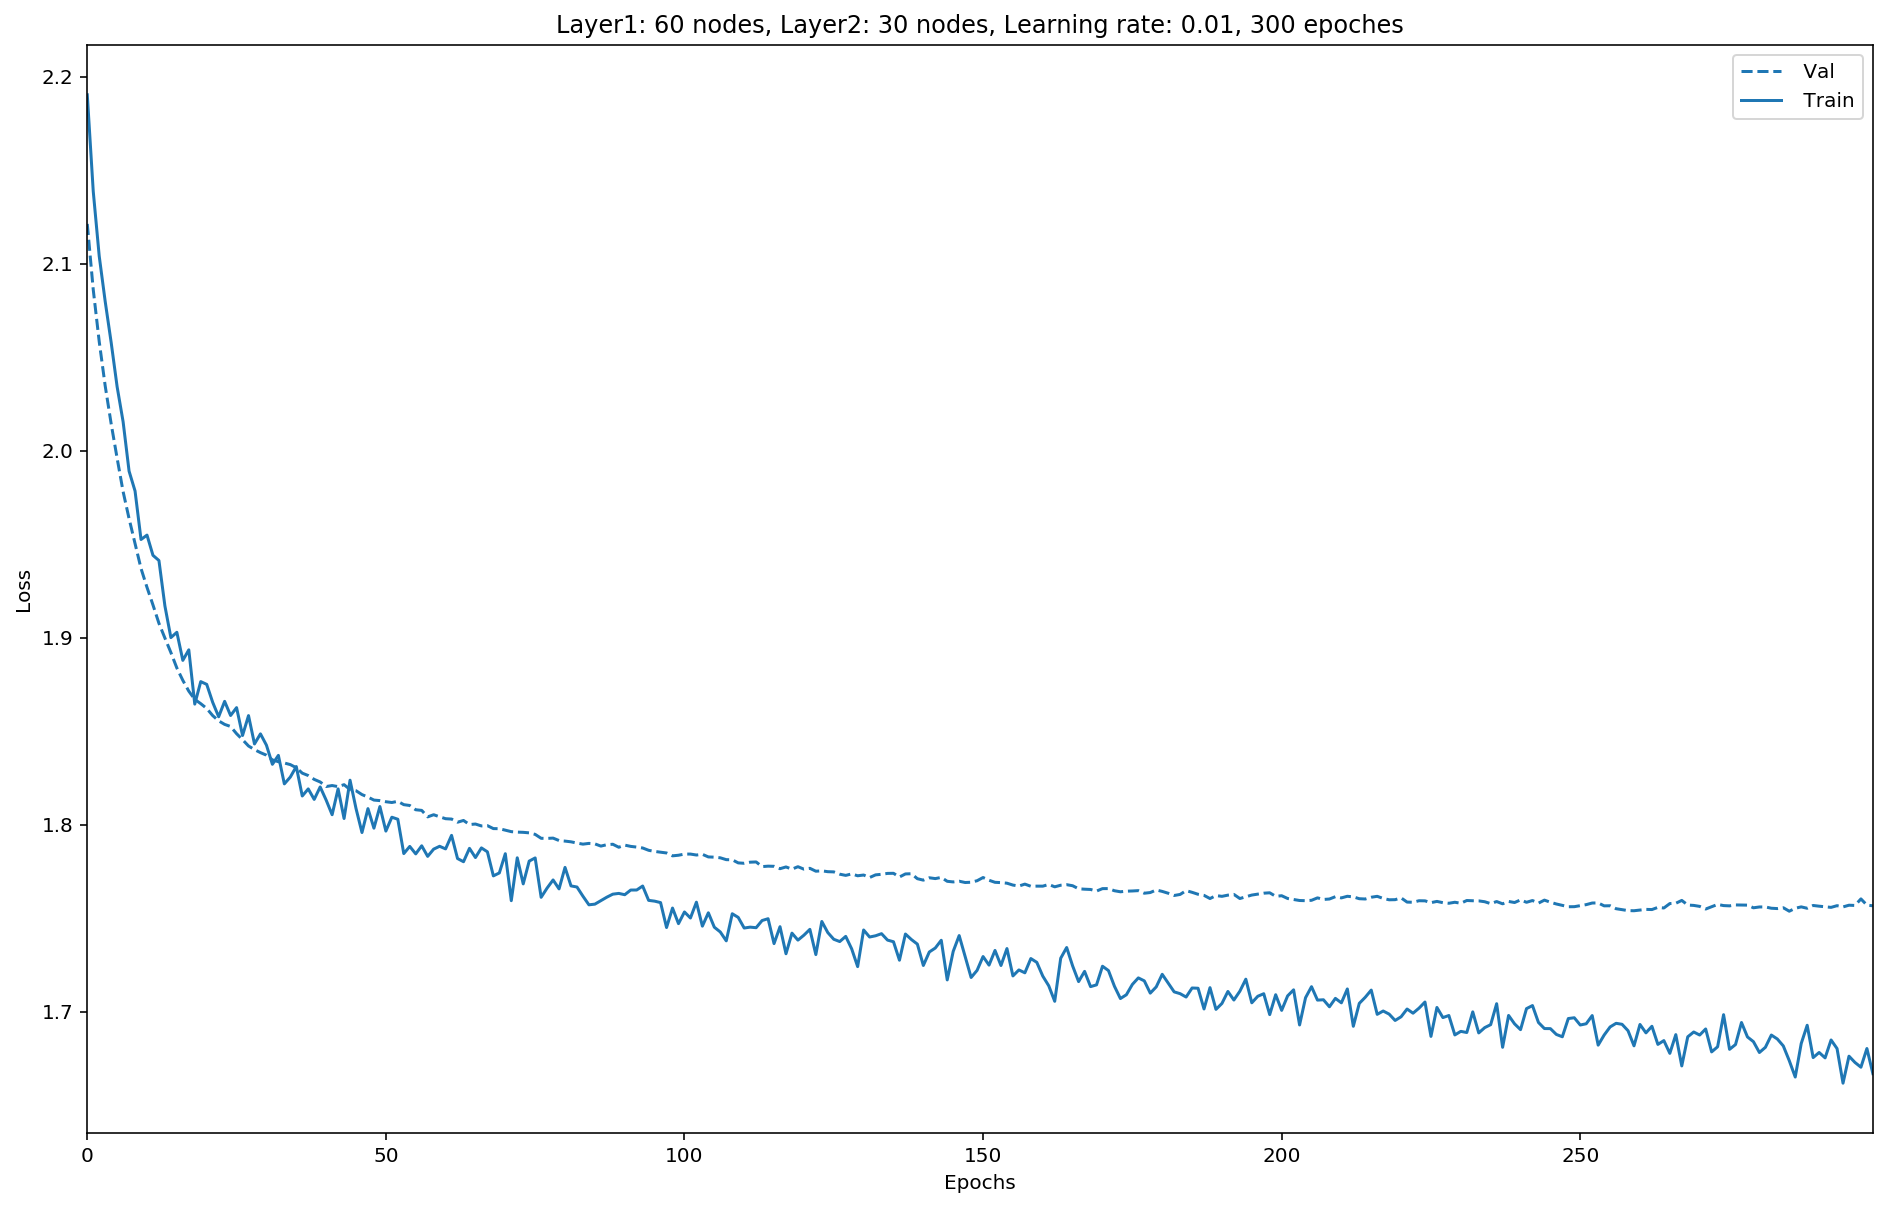

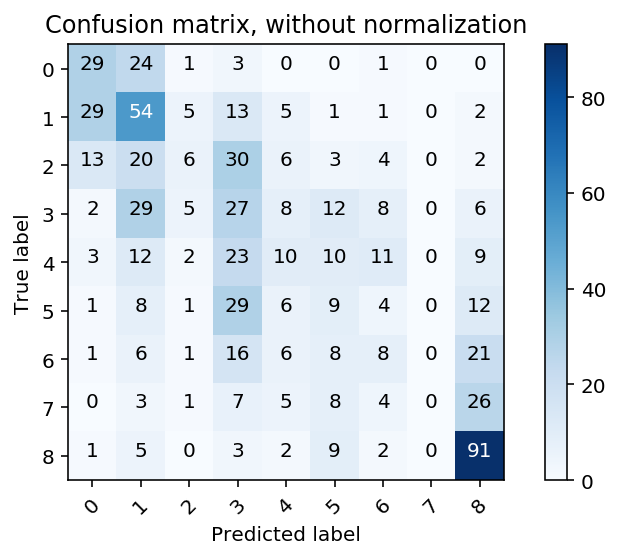

In [36]:
model = tftry_and_test(60,30,0.01 ,300)

In [ ]:
keras.models.save_model(model, "vsmodel")

### Load the Best Model Tuned

In [12]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model("vsmodel")

733/733 [==============================] - 0s 376us/step
Test Accuracy: 0.3574351980611377
Confusion matrix, without normalization
[[25 31  1  1  0  0  0  0  0]
 [18 78  1  9  2  1  1  0  0]
 [ 8 35  6 26  5  3  0  0  1]
 [ 0 37  1 24 17 10  2  0  6]
 [ 2 18  0 16 26  5  6  0  7]
 [ 0 14  1 15 15  8  3  0 14]
 [ 0  9  0 11 11 15  2  0 19]
 [ 0  4  0  5  9  7  7  0 22]
 [ 1  5  0  3  2  5  4  0 93]]
One-away Accuracy: 0.6043656207366985


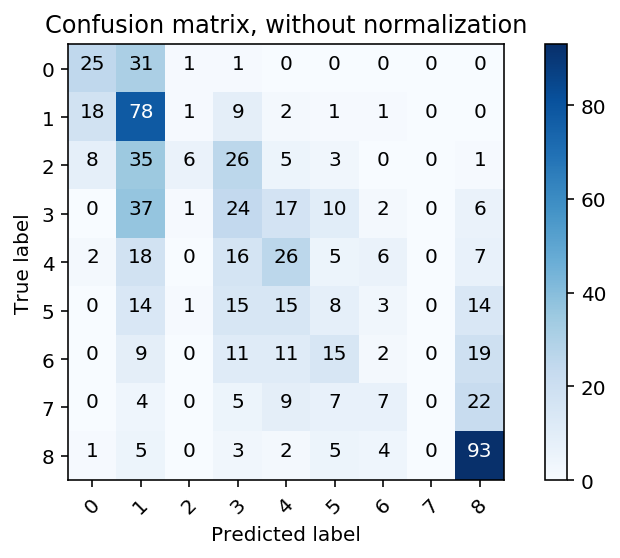

In [13]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import classification_report
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy: {}".format(test_acc))
# Get the predict results
y_pred = np.argmax(model.predict(x_test), axis=1)
#y_score = model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(9),
                      title='Confusion matrix, without normalization')

# calculate one-away
one_aways = 0
for i in range(9):
    sum_ = cnf_matrix[i][i]
    if i-1>0:
        sum_ += cnf_matrix[i-1][i]
    if i+1 < 9:
        sum_ += cnf_matrix[i+1][i]
    one_aways += sum_
print("One-away Accuracy: {}".format(one_aways/len(y_test)))

In [14]:
# plot model graph
keras.utils.plot_model(model, show_shapes=True)

## Check tensorflow is using GPU

In [33]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

### Feature Importance

In [20]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
headers= data.columns.values
for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, headers[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), headers['indices'])
# plt.xlabel('Relative Importance')
# plt.show()

Feature ranking:
1. feature budget (0.184396)
2. feature production_history_gross (0.150550)
3. feature ActorHistoryAverage_Gross (0.127442)
4. feature runtime (0.123007)
5. feature release_date (0.108049)
6. feature DirectorHistoryGross (0.074995)
7. feature genre_35 (0.023213)
8. feature genre_53 (0.021960)
9. feature genre_18 (0.021263)
10. feature genre_10749 (0.019824)
11. feature genre_80 (0.018989)
12. feature genre_28 (0.018279)
13. feature genre_12 (0.016388)
14. feature genre_878 (0.013637)
15. feature genre_9648 (0.013281)
16. feature genre_27 (0.012000)
17. feature genre_14 (0.011537)
18. feature genre_10751 (0.010606)
19. feature genre_10402 (0.006864)
20. feature genre_16 (0.006518)
21. feature genre_36 (0.005690)
22. feature genre_10752 (0.005021)
23. feature genre_37 (0.003708)
24. feature genre_99 (0.002302)
25. feature genre_10769 (0.000481)
26. feature genre_10770 (0.000000)
27. feature adult (0.000000)


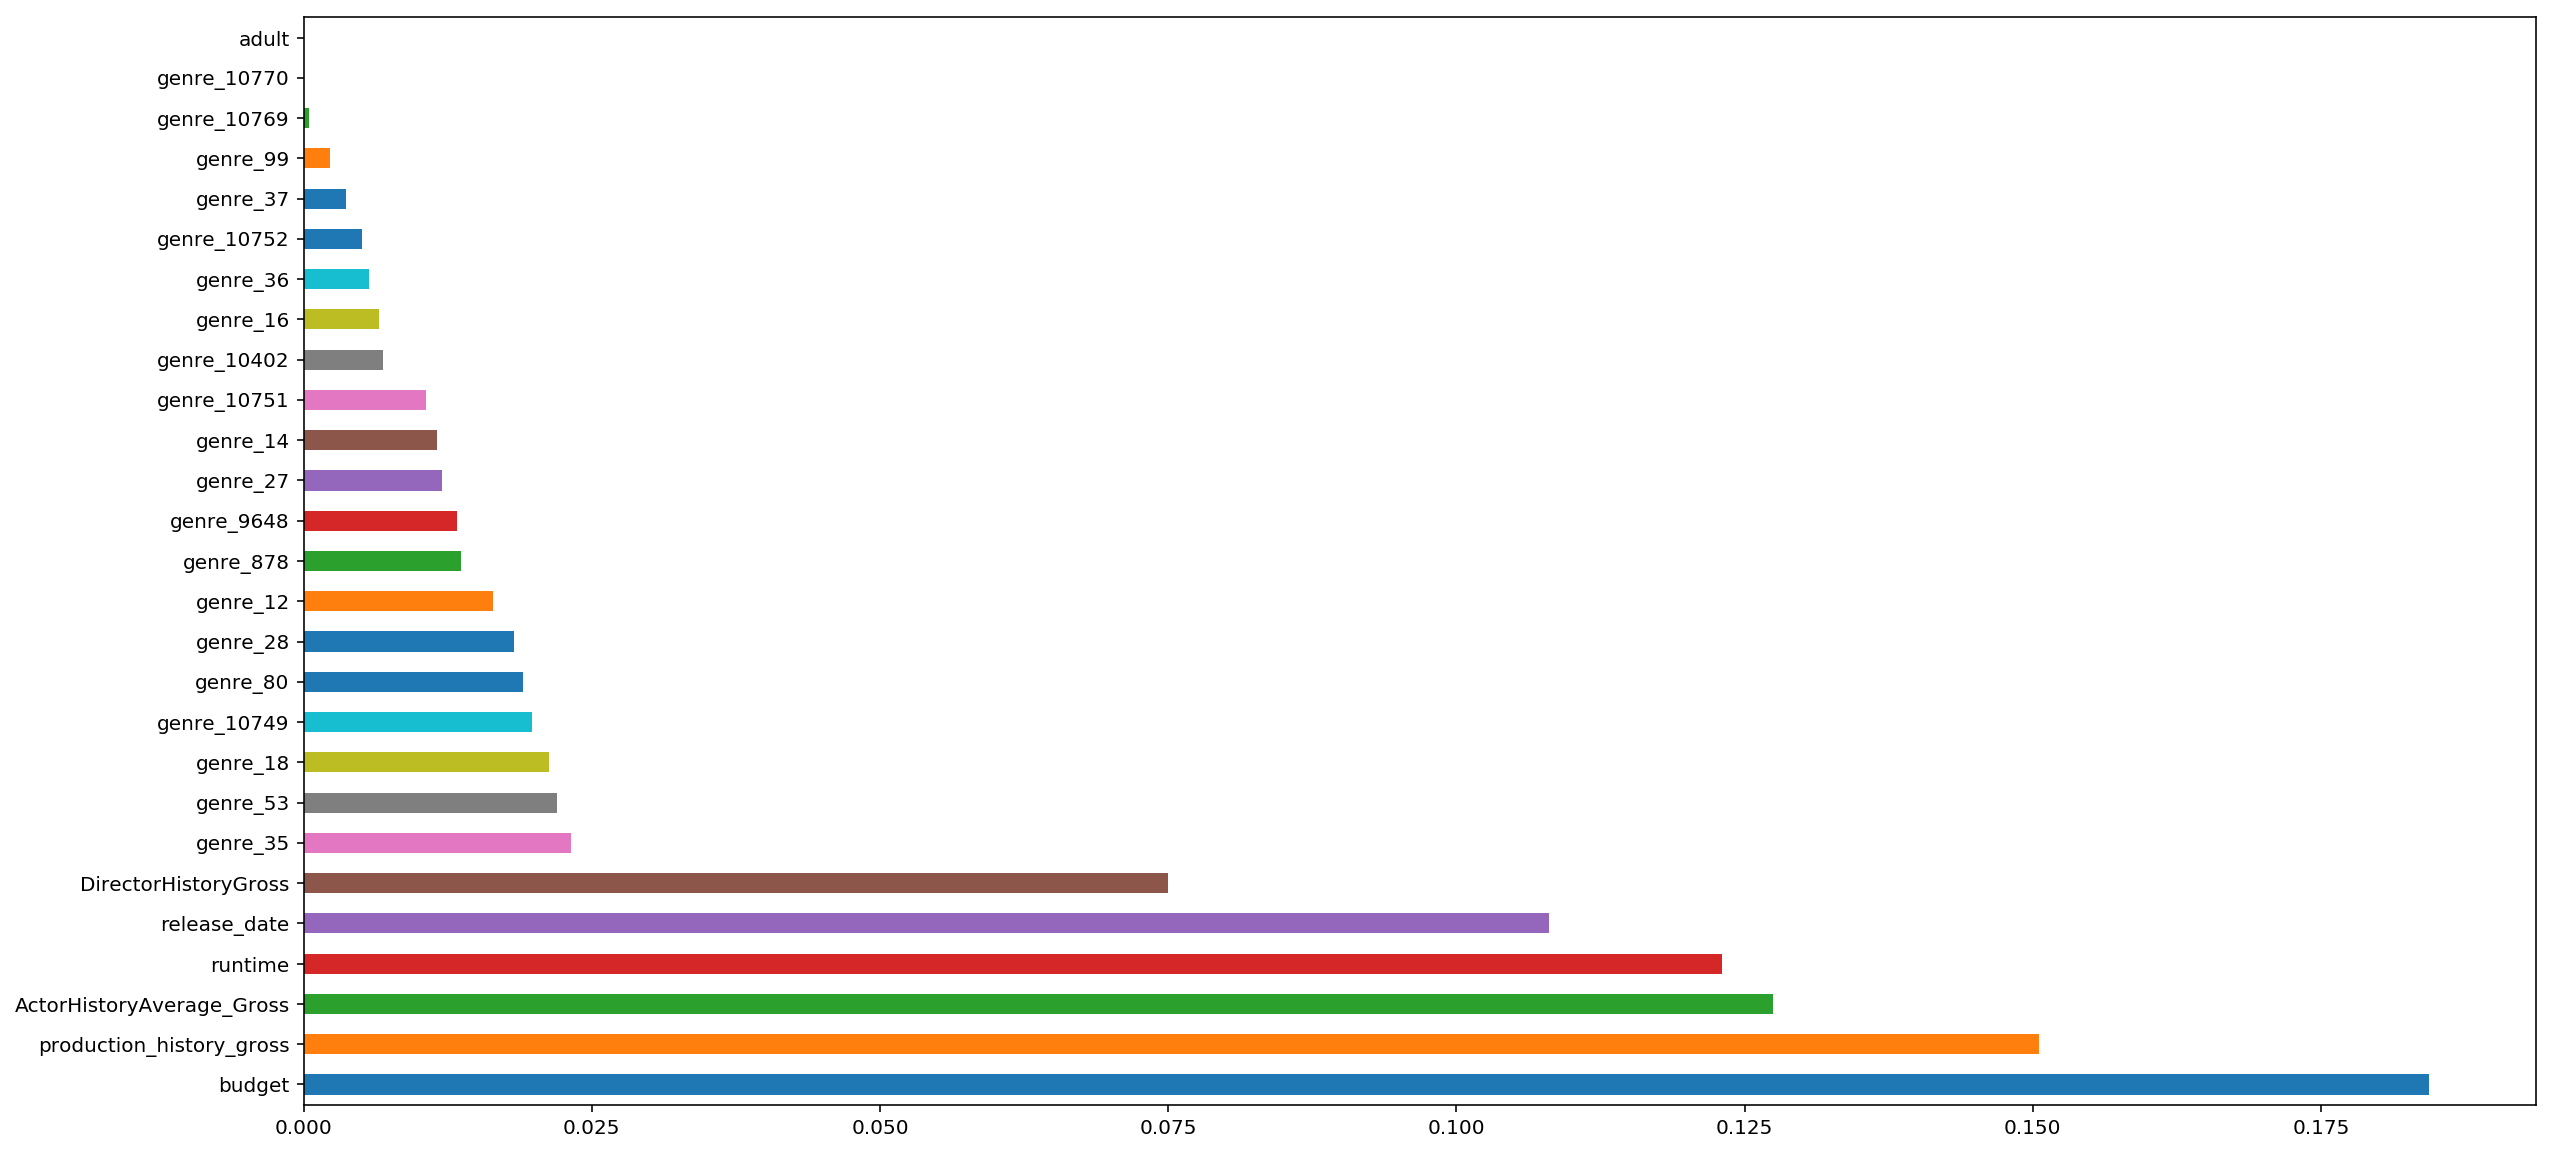

In [21]:
feat_importances = pd.Series(clf.feature_importances_, index=data.columns[:27])
feat_importances.nlargest(27).plot(kind='barh', figsize=(20,10))